In [5]:
import os
import numpy as np
import mne
import imageio
import h5py
#import scipy.fftpack
import matplotlib
import pywt
from mycolorpy import colorlist as mcp
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#from scipy import signal
from matplotlib.colors import ListedColormap
import time
import seaborn as sns
#import scipy.io as sio
#from scipy.integrate import simps
import pandas as pd
#from scipy import fft
import matplotlib.mlab as mlab
import sys

from tkinter import filedialog
from tkinter import *
import ntpath
root = Tk()
root.withdraw()
import math
import scipy
from scipy import signal
import pylab
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
import platform
from glob import glob
from scipy.io import savemat


from matplotlib.patches import Rectangle
import tqdm
from random import randint
from matplotlib.patches import Rectangle
import glob

cwd             = os.getcwd()

##all 
cond_vals   = np.arange(4)
cond_labels = ['BM', 'BL', 'Fuma', 'Benzo']
cond_colors = ['#494159','#594157', "#F1BF98","#8FB996"]

In [6]:
if platform.system()=='Windows':
    regions       = pd.read_excel("T:\EL_experiment\Patients\\" +'all'+"\elab_labels.xlsx", sheet_name='regions', header=0)
    
else: #'Darwin' for MAC
    regions       = pd.read_excel("/Volumes/EvM_T7/PhD/EL_experiment/Patients/all/elab_labels.xlsx", sheet_name='regions', header=0)
    

color_regions = regions.color.values
regions_G = regions.subregion.values
regions =regions.label.values

In [7]:
Fs             = 500
dur            = np.zeros((1,2), dtype=np.int32)
t0 = 1
dur[0,0] =  -t0
dur[0,1] =  3

#dur[0,:]       = np.int32(np.sum(abs(dur)))
x_ax           = np.arange(dur[0,0],dur[0,1],(1/Fs))
color_elab      = np.zeros((4,3))
color_elab[0,:] = np.array([31, 78, 121])/255
color_elab[1,:] = np.array([189, 215, 238])/255
color_elab[2,:] = np.array([0.256, 0.574, 0.431])
color_elab[3,:] = np.array([1, 0.574, 0])

labels_region[labels_region=='HIPP'] = 'Mesiotemporal'
labels_region[labels_region=='HIPP '] = 'Mesiotemporal'
labels_region[labels_region=='ENT'] = 'Basotemporal'

In [38]:
subjs = ['EL004', 'EL005','EL010', 'EL011', 'EL014'] # EL012: no sleep, EL013: no sleep scoreing
cond_folder  ='CR'
condition = 'Sleep'
## NMF AUC
for i in range(len(subjs)):
    print('loading -- '+subjs[i], end='\r')
    if platform.system()=='Windows':
        path_patient = 'T:\EL_experiment\Patients\\'+subjs[i]
    else: #'Darwin' for MAC
        path_patient    = '/Volumes/EvM_T7/PhD/EL_experiment/Patients/'+subjs[i]
    # labels
    lbls            = pd.read_excel(path_patient + "/infos/" + subjs[i] + "_labels.xlsx", header=0, sheet_name='BP')
    labels_all      = lbls.label.values
    labels_clinic   = lbls.Clinic.values
    labels_region   = lbls.Region.values
    # load connections
    file         = glob.glob(path_patient + '/Analysis/InputOutput/' + cond_folder + '/NNMF/LL/IO_'+condition+'_AUC_1*.csv')[0]

    data_A    = pd.read_csv(file)
    data_A.insert(0, 'Subj', subjs[i])
    
    #data_A = data_A[~np.isnan(data_A.N1.values)]
    if i==0:
        data_con    = data_A
    else:
        data_con = pd.concat([data_con, data_A])   

In [39]:
data_con

,Subj,Area,Stim_L,Stim,H,Sleep,AUC,Pearson,N_trial
0,EL004,Central,R_PostCS_inf-6,5.0,2.0,0.0,0.680246,1.0,1192.0
1,EL004,Central,R_PostCS_inf-6,5.0,2.0,1.0,0.236352,1.0,13.0
2,EL004,Central,R_PostCS_inf-6,5.0,2.0,2.0,0.663332,1.0,370.0
3,EL004,Central,R_PostCS_inf-6,5.0,2.0,3.0,0.663618,1.0,61.0
4,EL004,Central,R_PostCS_inf-6,5.0,2.0,4.0,0.662622,1.0,165.0
...,...,...,...,...,...,...,...,...,...
55,EL014,Laterotemporal,STS54,53.0,8.0,0.0,0.499578,1.0,1385.0
56,EL014,Laterotemporal,STS54,53.0,8.0,1.0,0.522410,1.0,23.0
57,EL014,Laterotemporal,STS54,53.0,8.0,2.0,0.362669,1.0,174.0
58,EL014,Laterotemporal,STS54,53.0,8.0,3.0,0.522017,1.0,65.0


In [10]:

if platform.system()=='Windows':
    path_patients = 'T:\EL_experiment\Patients\\'
    
else: #'Darwin' for MAC
    path_patients    = '/Volumes/EvM_T7/PhD/EL_experiment/Patients/'

In [ ]:
stop

#### PLOT

In [40]:
color_subj=mcp.gen_color(cmap="Pastel1",n=len(np.unique(data_con.Subj)))
print(color_subj)

['#fbb4ae', '#ccebc5', '#fed9a6', '#e5d8bd', '#f2f2f2']


In [41]:
data_con = data_con[data_con.Sleep<9]

In [128]:
dat = data_con.loc[(data_con.Sleep!=1)&(data_con.H==h)&(data_con.Stim==stim)&(data_con.Subj==s)]
dat

,Subj,Stim_L,Stim,H,Sleep,AUC,Pearson,N_trial
95,EL011,L_SFS66,65.0,5.0,0.0,0.676953,0.716748,2235.0
97,EL011,L_SFS66,65.0,5.0,2.0,0.673575,0.716748,365.0
98,EL011,L_SFS66,65.0,5.0,3.0,0.684829,0.716748,125.0
99,EL011,L_SFS66,65.0,5.0,4.0,0.674255,0.716748,146.0


In [1]:
data_con

NameError: name 'data_con' is not defined

In [30]:
(dat.loc[dat.Sleep==3, 'AUC'].values[0]/dat.loc[dat.Sleep==0, 'AUC'].values[0])

0.9720282877523333

In [32]:
data_con

,Subj,Stim_L,Stim,H,Sleep,AUC,Pearson,N_trial
24,EL004,R_PostCS_inf-6,5.0,5.0,0.0,0.654947,0.922549,1030.0
25,EL004,R_PostCS_inf-6,5.0,5.0,1.0,0.217152,0.922549,13.0
26,EL004,R_PostCS_inf-6,5.0,5.0,2.0,0.627472,0.922549,368.0
27,EL004,R_PostCS_inf-6,5.0,5.0,3.0,0.636627,0.922549,61.0
28,EL004,R_PostCS_inf-6,5.0,5.0,4.0,0.625316,0.922549,165.0
...,...,...,...,...,...,...,...,...
95,EL011,L_SFS66,65.0,5.0,0.0,0.676953,0.716748,2235.0
96,EL011,L_SFS66,65.0,5.0,1.0,0.526251,0.716748,16.0
97,EL011,L_SFS66,65.0,5.0,2.0,0.673575,0.716748,365.0
98,EL011,L_SFS66,65.0,5.0,3.0,0.684829,0.716748,125.0


In [33]:
np.unique(data_con.loc[(data_con.Stim==stim)&(data_con.Subj==s), 'H'])

array([5.])

In [42]:
s = 'EL005'
for stim in np.unique(data_con.loc[(data_con.Subj==s), 'Stim']):
    for h in np.unique(data_con.loc[(data_con.Stim==stim)&(data_con.Subj==s), 'H']):
        dat = data_con.loc[(data_con.Sleep!=1)&(data_con.H==h)&(data_con.Stim==stim)&(data_con.Subj==s)]
        if (dat.loc[dat.Sleep==3, 'AUC'].values[0]/dat.loc[dat.Sleep==0, 'AUC'].values[0])>1:
            print(dat.Stim_L.values[0]+' - increase - '+str(h))
        else:
            print(dat.Stim_L.values[0]+' - decrease - '+str(h))

L_PlanTGsup11 - decrease - 1.0
L_STG_mid21 - increase - 3.0
L_HippMol_head34 - decrease - 3.0
L_LIG59 - increase - 2.0


In [34]:
for s in np.unique(data_con.Subj):
    l =0
    for stim in np.unique(data_con.loc[(data_con.Subj==s), 'Stim']):
        for h in np.unique(data_con.loc[(data_con.Stim==stim)&(data_con.Subj==s), 'H']):
            dat = data_con.loc[(data_con.Sleep!=1)&(data_con.H==h)&(data_con.Stim==stim)&(data_con.Subj==s)]
            if (dat.loc[dat.Sleep==3, 'AUC'].values[0]/dat.loc[dat.Sleep==0, 'AUC'].values[0])>1:
                print(dat.Stim_L.values[0]+' - increase - '+str(h))
            else:
                print(dat.Stim_L.values[0]+' - decrease - '+str(h))

R_PostCS_inf-6 - decrease - 5.0
R_SubCG-28 - decrease - 2.0
R_PreCS_inf_mid-50 - increase - 1.0
R_PreCS_inf_mid-50 - decrease - 3.0
R_HippSub-61 - decrease - 4.0
L_PlanTGsup11 - decrease - 1.0
L_STG_mid21 - increase - 2.0
L_HippMol_head34 - decrease - 5.0
L_LIG59 - decrease - 4.0
L_HIPP1 - increase - 3.0
L_RostrS19 - increase - 2.0
L_CircIS_sup34 - decrease - 5.0
L_HIPP54 - increase - 1.0
L_ENT8 - increase - 1.0
L_ENT8 - decrease - 2.0
L_HIPP28 - increase - 4.0
L_SIG56 - decrease - 3.0
L_SFS66 - increase - 5.0


In [27]:
dat.loc[dat.Sleep==3, 'AUC'].values[0]/dat.loc[dat.Sleep==0, 'AUC'].values[0]

1.0116340447346466

In [60]:
data_con

,Subj,Cond_Label,Area,Stim_L,Stim,H,Day,Hour,Condition,AUC,Pearson,N_trial
0,EL003,BL,Mesiotemporal,R_HIPP_Mol10,9.0,1.0,0.0,8.0,1.0,0.745657,1.0,46.0
1,EL003,Benzo,Mesiotemporal,R_HIPP_Mol10,9.0,1.0,0.0,14.0,3.0,0.752307,1.0,48.0
2,EL003,BL,Mesiotemporal,R_HIPP_Mol10,9.0,3.0,0.0,8.0,1.0,0.766398,1.0,46.0
3,EL003,Benzo,Mesiotemporal,R_HIPP_Mol10,9.0,3.0,0.0,14.0,3.0,0.465705,1.0,48.0
4,EL003,BL,Superotemporal,R_TTG57,56.0,4.0,0.0,8.0,1.0,0.683900,1.0,47.0
5,EL003,Benzo,Superotemporal,R_TTG57,56.0,4.0,0.0,14.0,3.0,0.506409,1.0,44.0
6,EL004,BL,Central,R_PostCS_inf-6,5.0,2.0,0.0,8.0,1.0,0.691881,1.0,51.0
7,EL004,Benzo,Central,R_PostCS_inf-6,5.0,2.0,0.0,10.0,3.0,0.542982,1.0,51.0
8,EL004,BL,Central,R_PreCS_inf_mid-50,49.0,1.0,0.0,8.0,1.0,0.788596,1.0,51.0
9,EL004,Benzo,Central,R_PreCS_inf_mid-50,49.0,1.0,0.0,10.0,3.0,0.735875,1.0,51.0


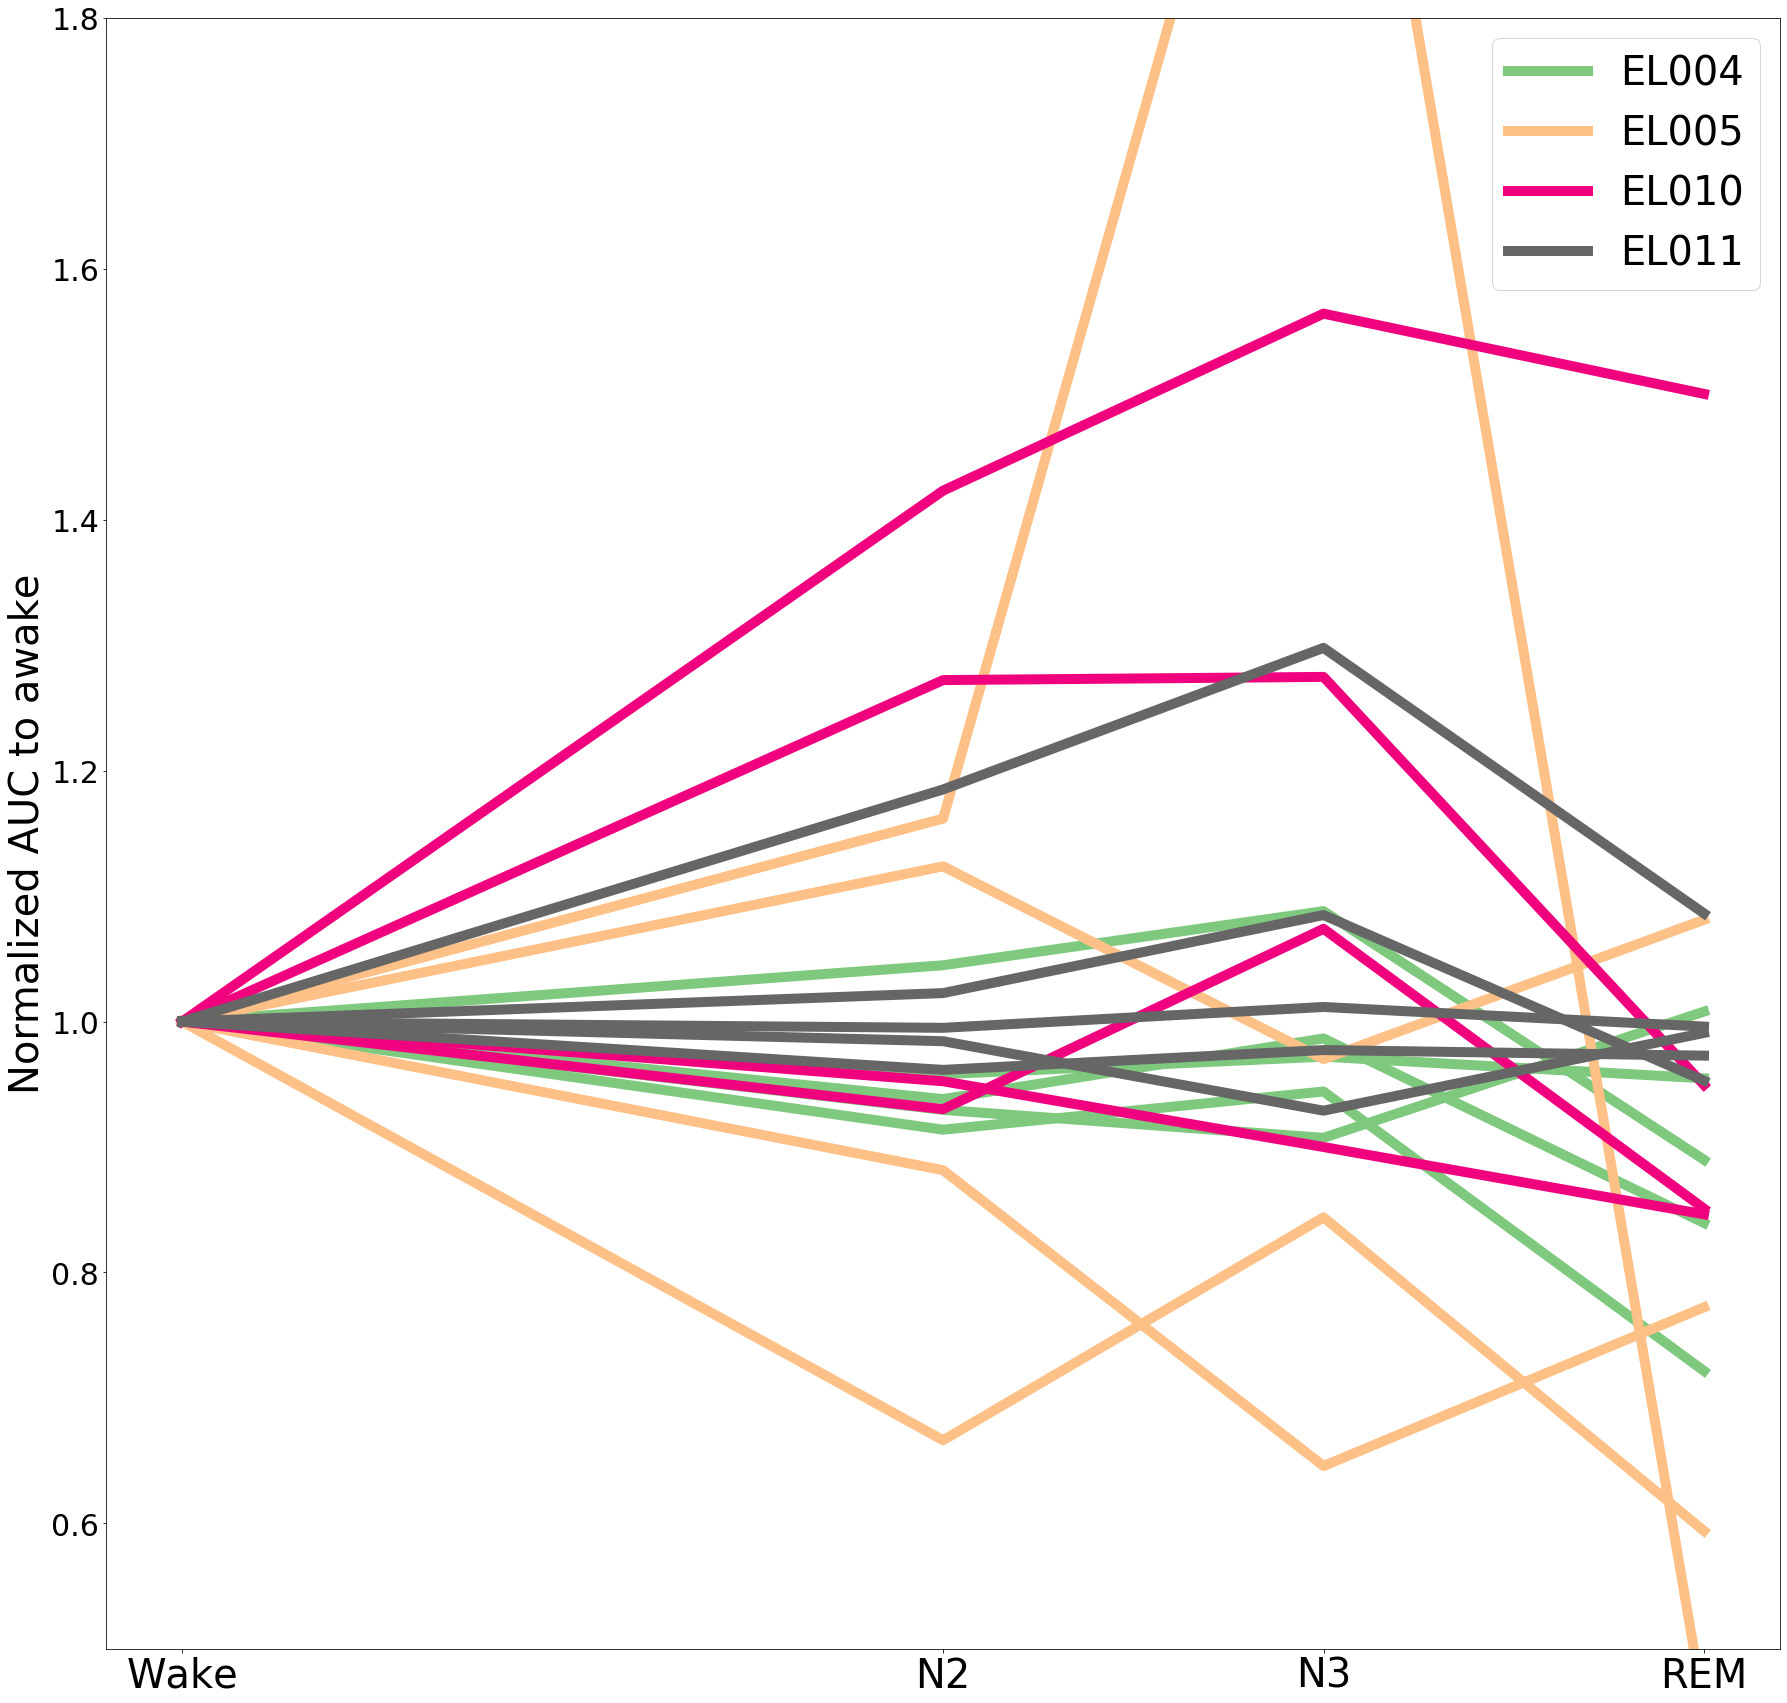

In [20]:
color_subj=mcp.gen_color(cmap='Accent',n=len(np.unique(data_con.Subj)))
#color_subj=mcp.gen_color(cmap="Pastel1",n=len(np.unique(data_con.Subj)))

fig = plt.figure(figsize=(30,30))
j= 0
for s in np.unique(data_con.Subj):
    l =0
    for stim in np.unique(data_con.loc[(data_con.Subj==s), 'Stim']):
        for h in np.unique(data_con.loc[(data_con.Stim==stim)&(data_con.Subj==s), 'H']):
            dat = data_con.loc[(data_con.Sleep!=1)&(data_con.H==h)&(data_con.Stim==stim)&(data_con.Subj==s)]
            mn = dat.loc[dat.Sleep==0, 'AUC'].values[0]
            
            if l ==0:
                plt.plot(dat.Sleep, dat.AUC/mn, linewidth=10, color= color_subj[j], label= s)
            else:
                plt.plot(dat.Sleep, dat.AUC/mn, linewidth=10, color= color_subj[j])
            
            l = l+1
            
    j = j+1
#plt.xticks([1,3])
plt.ylim([0.5,1.8])
plt.ylabel('Normalized AUC to awake', fontsize=40)
plt.xticks([0,2,3,4], ['Wake', 'N2', 'N3', 'REM'], fontsize=40)
plt.yticks(fontsize=30)
# ax =sns.boxplot(x='Condition', y= 'AUC', hue='Cond_Label', data= data_con, palette=[cond_colors[1],cond_colors[3]])
# plt.xticks([0,1],[cond_labels[1],cond_labels[3]] )
# plt.xlabel('Condition', fontsize=18)
# plt.ylabel('AUC', fontsize=18)
# plt.title('AUC across patient', fontsize=20)
# plt.tick_params(axis='both', labelsize=15)
plt.legend(fontsize=40)
plt.savefig(path+'\AUC_Sleep.svg', transparent=True)
plt.savefig(path+'\AUC_Sleep.jpg', transparent=True)
plt.show()

## LL and Significant responses 

In [14]:
subjs = ['EL003', 'EL004', 'EL005','EL008', 'EL010', 'EL012', 'EL014']

In [9]:
cond_folder  ='Ph'

In [11]:
os.makedirs(os.path.join(path_patients, "all","Analysis"), exist_ok=True)
os.makedirs(os.path.join(path_patients, "all","Analysis", "IO"), exist_ok=True)
os.makedirs(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF"), exist_ok=True)
os.makedirs(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures"), exist_ok=True)

In [10]:
cond_folder ='Ph'

In [22]:
## NMF AUC
n_chans = np.zeros((len(subjs), ))
for i in range(len(subjs)):
    print('loading -- '+subjs[i], end='\r')
    subj = subjs[i]
    path_patient_analysis = 'Y:\eLab\EvM\Projects\EL_experiment\Analysis\Patients\\'+subj

    path_gen = os.path.join('y:\\eLab\Patients\\' + subj)
    if not os.path.exists(path_gen):
        path_gen = 'T:\\EL_experiment\\Patients\\' + subj
    path_patient = path_gen + '\Data\EL_experiment'  # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj
    path_infos = os.path.join(path_patient, 'infos')
    if not os.path.exists(path_infos):
        path_infos = path_gen + '\\infos'

    
    # labels
    lbls            = pd.read_excel(path_infos + "\\" + subjs[i] + "_labels.xlsx", header=0, sheet_name='BP')
    lbls_MP            = pd.read_excel(path_infos + "\\" + subjs[i] + "_labels.xlsx", header=0, sheet_name='atlas')
    labels_all      = lbls.label.values
    labels_clinic   = lbls.Clinic.values
    labels_region   = lbls.Region.values
    # load connections
    n_chans[i] = len(lbls_MP)
    file         = glob.glob(path_patient_analysis + '\\InputOutput\\' + cond_folder + '/NNMF/IO_Ph_AUC_LLpeak_1*.csv')[0]

    data_A    = pd.read_csv(file)
    data_A.insert(0, 'Subj', subjs[i])
    
    #data_A = data_A[~np.isnan(data_A.N1.values)]
    if i==0:
        data_con    = data_A
    else:
        data_con = pd.concat([data_con, data_A])   
data_con = data_con.reset_index(drop=True)        
data_con.loc[(data_con.Subj=='EL010')&(data_con.H==1), 'Pearson'] =-1

data_con.loc[(data_con.Subj=='EL008')&(data_con.Stim==33)&(data_con.H!=2), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL014')&(data_con.Stim==44)&(data_con.H!=2), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL014')&(data_con.Stim==11)&(data_con.H!=1), 'Pearson'] =-1
data_con.loc[(data_con.Subj=='EL003')&(data_con.Stim==56)&(data_con.H!=4), 'Pearson'] =-1
data_con = data_con[data_con.Pearson>0.01]

In [18]:
data_con = data_con.drop(columns=['Day', 'Hour', 'Condition', 'Pearson'])

In [20]:
data_con.to_csv('Y:\eLab\EvM\Projects\EL_experiment\GABA_figures\Fig3\AUC_NMF.csv')

In [53]:
data_con = data_con.reset_index(drop=True) 

In [54]:
data_con.to_csv(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", 'AUC_across.csv'), index=False,header=True)

In [23]:
from scipy.stats import wilcoxon

w, p = wilcoxon(data_con.loc[data_con.Condition==1, 'AUC'], data_con.loc[data_con.Condition==3, 'AUC'])
p

0.000152587890625

(0.2, 0.9)

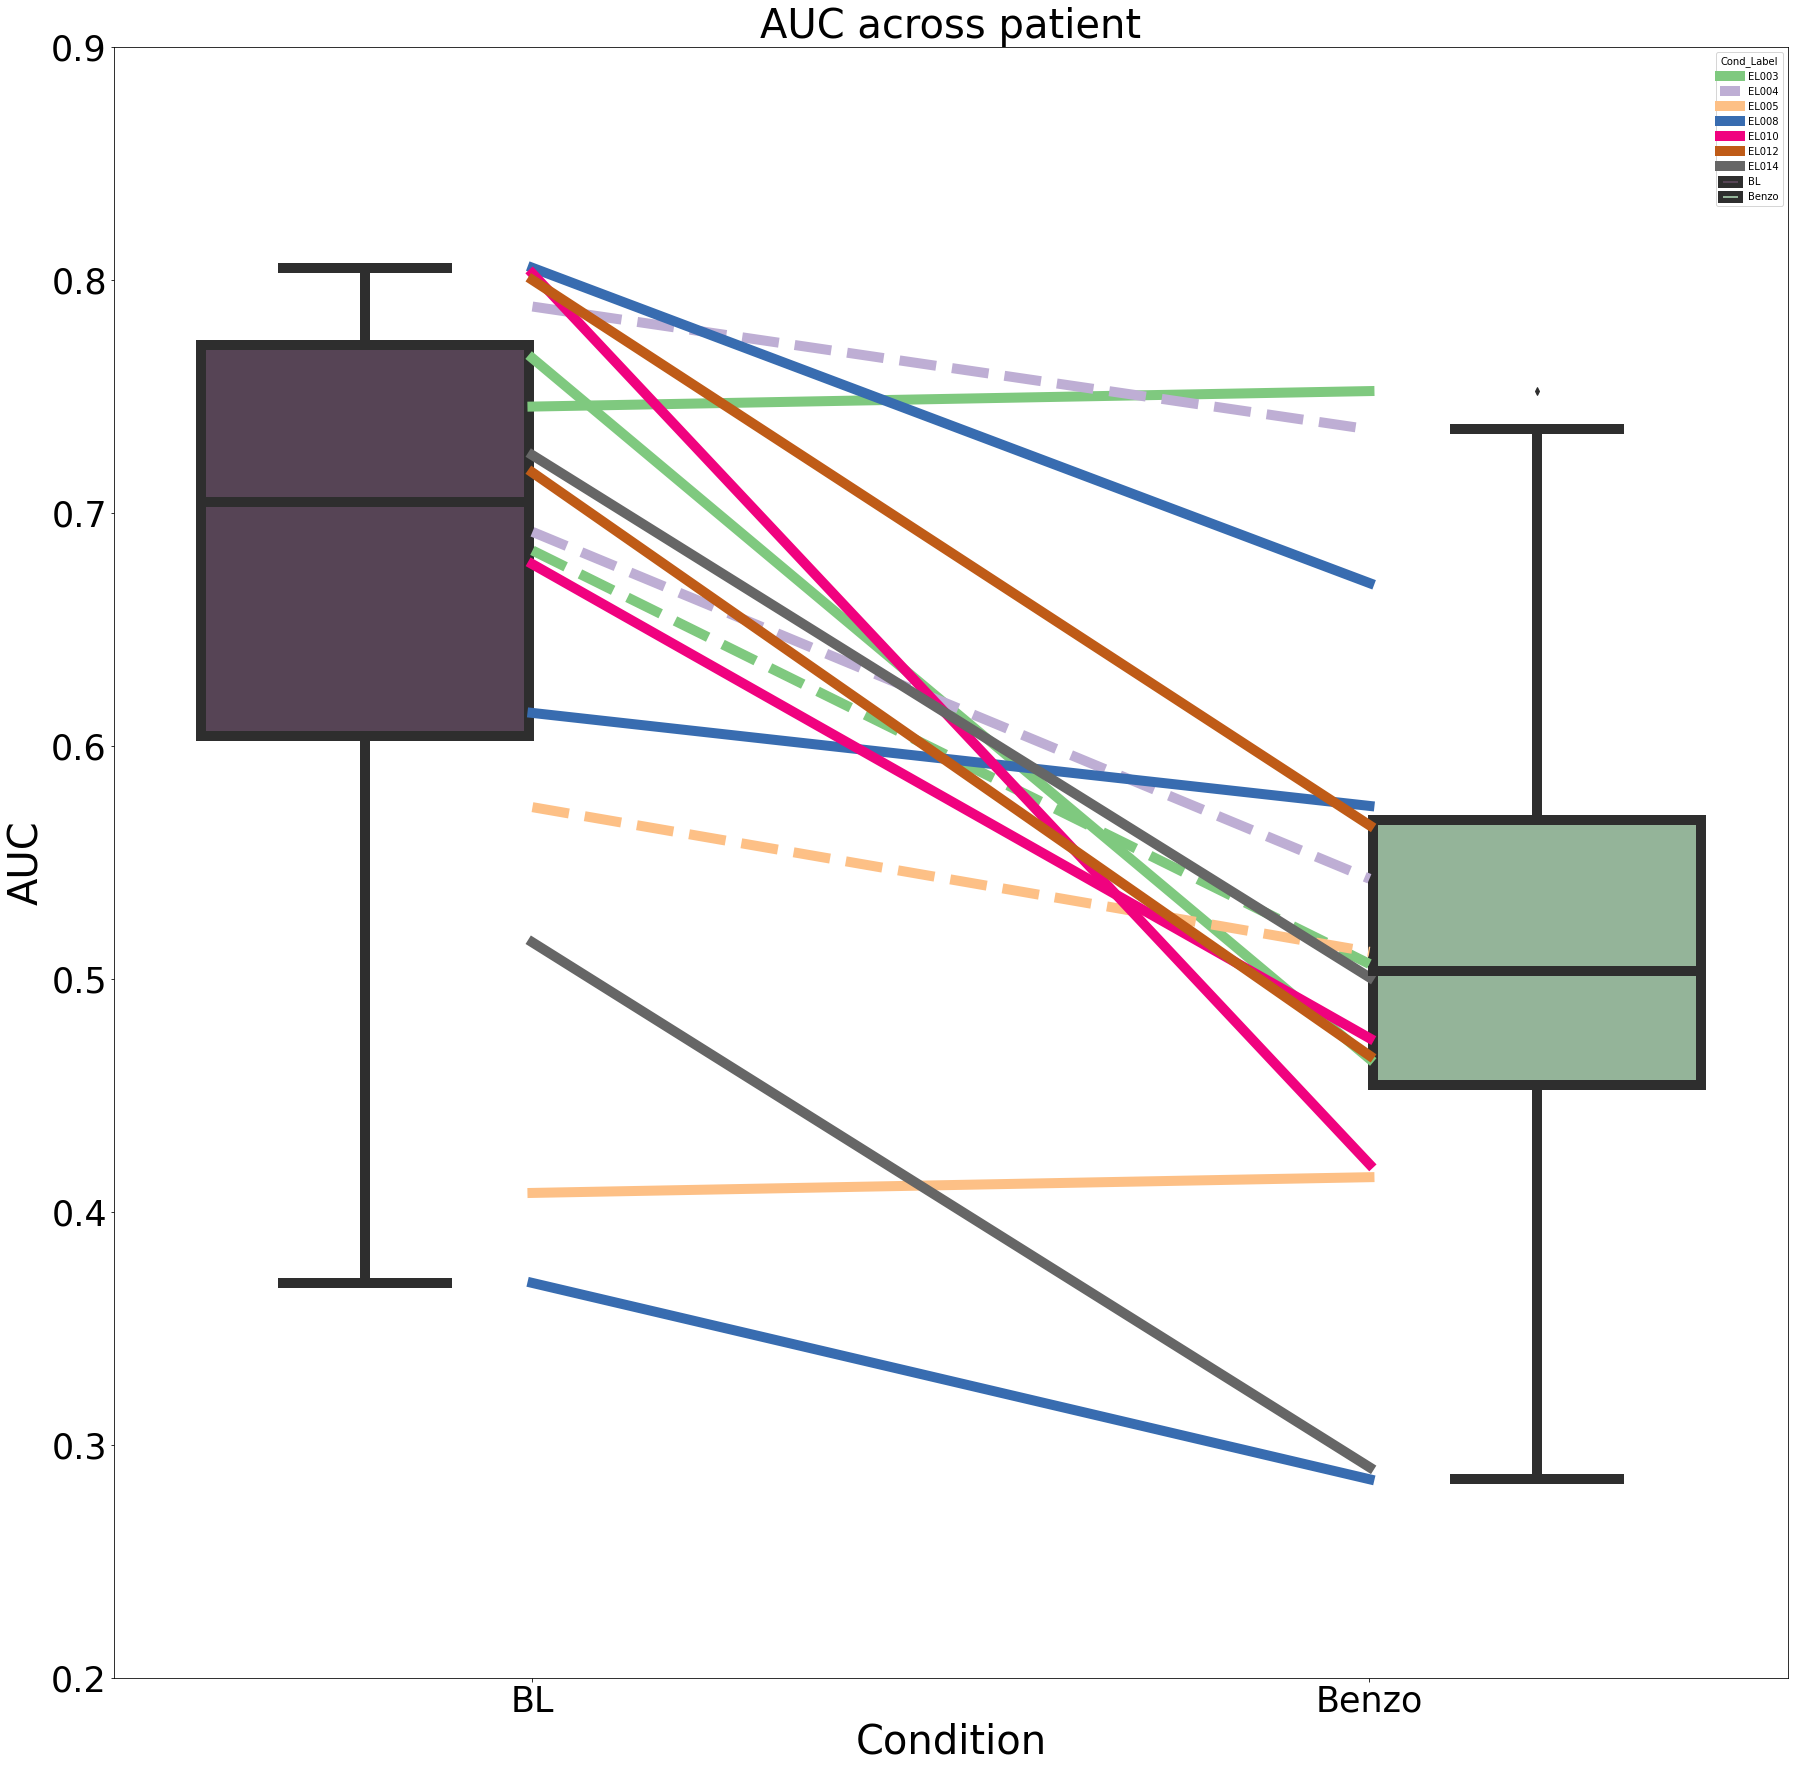

In [24]:
color_subj=mcp.gen_color(cmap='Accent',n=len(np.unique(data_con.Subj)))

fig = plt.figure(figsize=(30,30))
fig.patch.set_facecolor('xkcd:white')
j= 0
for s in np.unique(data_con.Subj):
    l =0
    for stim in np.unique(data_con.loc[(data_con.Subj==s), 'Stim']):
        for h in np.unique(data_con.loc[(data_con.Stim==stim)&(data_con.Subj==s), 'H']):
            dat = data_con.loc[(data_con.H==h)&(data_con.Stim==stim)&(data_con.Subj==s)]
            if dat.Area.values[0] == 'Mesiotemporal':
                if l ==0:
                    plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=10, color= color_subj[j], label= s)
                else:
                    plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=10, color= color_subj[j])
            else:
                if l ==0:
                    plt.plot(0.5*(dat.Condition-1), dat.AUC, '--',linewidth=10, color= color_subj[j], label= s)
                else:
                    plt.plot(0.5*(dat.Condition-1), dat.AUC, '--', linewidth=10, color= color_subj[j])
            #plt.plot(0.5*(dat.Condition-1), dat.AUC, linewidth=10, color= color_subj[j])
            l = l+1
            
    j = j+1
plt.xticks([1,3])
plt.legend()
ax =sns.boxplot(x='Condition', y= 'AUC', hue='Cond_Label', data= data_con, palette=[cond_colors[1],cond_colors[3]], linewidth= 10)
plt.xticks([0,1],[cond_labels[1],cond_labels[3]] )
plt.xlabel('Condition', fontsize=40)
plt.ylabel('AUC', fontsize=40)
plt.title('AUC across patient', fontsize=40)
plt.tick_params(axis='both', labelsize=35)
#plt.legend()
plt.ylim([0.2,0.9])
plt.savefig(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures", "AUC_Ph.svg"), transparent=True)
plt.savefig(os.path.join(path_patients, "all","Analysis", "IO", "Ph", "NNMF", "figures", "AUC_Ph.jpg"), transparent=True)

In [ ]:
##connection trial
for i in range(len(subjs)):
    print('loading -- '+subjs[i], end='\r')
    if platform.system()=='Windows':
        path_patient = 'T:\EL_experiment\Patients\\'+subjs[i]
    else: #'Darwin' for MAC
        path_patient    = '/Volumes/EvM_T7/PhD/EL_experiment/Patients/'+subjs[i]
    # labels
    lbls            = pd.read_excel(path_patient + "/infos/" + subjs[i] + "_labels.xlsx", header=0, sheet_name='BP')
    labels_all      = lbls.label.values
    labels_clinic   = lbls.Clinic.values
    labels_region   = lbls.Region.values
    # load connections
    file_con_trial = path_patient + '/Analysis/InputOutput/' + cond_folder + '/data/con_trial.csv'

    data_A    = pd.read_csv(file_con_trial)
    data_A.insert(0, 'Subj', subjs[i])
    data_A.insert(1, 'StimR', '0')
    data_A.insert(2, 'ChanR', '0')
    for c in np.unique(data_A[['Chan', 'Stim']]).astype('int'):
        data_A.loc[data_A.Chan==c, 'ChanR'] = labels_region[c]
        data_A.loc[data_A.Stim==c, 'StimR'] = labels_region[c]
        data_A.loc[data_A.Chan==c, 'Chan'] = labels_all[c]
        data_A.loc[data_A.Stim==c, 'Stim'] = labels_all[c]
    #data_A = data_A[~np.isnan(data_A.N1.values)]
    if i==0:
        data_con    = data_A
    else:
        data_con = pd.concat([data_con, data_A])   

  axIO.set_title('IO curve',fontsize=18)
    axIO.set_ylabel('LL uv/ms [250ms] normalized',fontsize=16)
    axIO.set_xlabel('Intensity [mA]',fontsize=16)

In [ ]:
dist_groups = np.array([[0,15],[15,30],[30,60],[60,120]])
dist_labels = ['local (<15 mm)', 'short (<30mm)', 'mid (<60mm)', 'long']
data_con.insert(7, 'Dist_Group', 0)
for i in range(len(dist_labels)):
    data_con.loc[(data_con.d<dist_groups[i,1])&(data_con.d>=dist_groups[i,0]),'Dist_Group' ] = dist_labels[i]
    
data_con = data_con.sort_values(by=['d'])

In [ ]:
fig = plt.figure(figsize=(10,10))
gs         = fig.add_gridspec(2,1) #, width_ratios=[5,3]
#plt.suptitle(subj)
ax = fig.add_subplot(gs[0,0])
plt.ylim([0,0.1])
plt.title('P2P N1')
sns.boxplot(x='Dist_Group', y= 'tN1', data = data_con)
plt.xticks([])
plt.xlabel('')
fig.add_subplot(gs[1,0])
plt.title('P2P N2')
plt.ylim([0,0.5])
#sns.boxplot(x='dist_group', y= 't_N1', data = con_trial)
sns.boxplot(x='Dist_Group', y= 'tN2', data = data_con)

plt.show()

In [ ]:
data_con = data_con.drop(data_con[data_con.ChanR=='WM'].index)

In [ ]:
dat_plot   = data_con[(data_con.pN2<2000)&(data_con.pN1<3000)]
fig        = plt.figure(figsize=(10,10))
gs         = fig.add_gridspec(2,1) #, width_ratios=[5,3]
plt.suptitle('Across Patients')
ax = fig.add_subplot(gs[0,0])
plt.title('P2P N1')
sns.scatterplot(x='tN1', y= 'pN1', data = dat_plot, hue= 'Dist_Group', style='Subj')
plt.xlabel('')
plt.xlim([0, 0.4])
fig.add_subplot(gs[1,0], sharex=ax, sharey=ax)
plt.title('P2P N2')
sns.scatterplot(x='tN2', y= 'pN2', data = dat_plot, hue= 'Dist_Group', style='Subj')
plt.xlabel('time [s]')

plt.show()

In [ ]:
fig = plt.figure(figsize=(10,10))
gs         = fig.add_gridspec(2,1) #, width_ratios=[5,3]
plt.suptitle('Across Patients')
ax = fig.add_subplot(gs[0,0])
plt.title('P2P N1')
sns.scatterplot(x='tN1', y= 'pN1', data = dat_plot, hue= 'Dist_Group', style='Subj')
plt.xlabel('')
plt.xlim([0, 0.4])
fig.add_subplot(gs[1,0], sharex=ax, sharey=ax)
plt.title('P2P N2')
sns.scatterplot(x='tN2', y= 'pN2', data = dat_plot, hue= 'Dist_Group', style='Subj')
plt.xlabel('time [s]')

plt.show()

In [ ]:
plt.figure(figsize=(15,8))
b = sns.scatterplot(x="d", y='LL', hue='sig_trial', data=data_con)
plt.xlim([9.5,90])
plt.xlabel('distance [mm]',fontsize=16)
#plt.xlabel('N1 [\u0394 \u03BCV]')
plt.ylabel('LL [\u0394 \u03BCV /ms]',fontsize=16) 
b.tick_params(labelsize=12)
plt.show()

In [ ]:
data_con_s.insert(10, 'sN1/N2',0)
data_con_s['sN1/N2']= data_con_s['sN1']/data_con_s['sN2']

In [ ]:
sns.catplot(x="Dist", y='N1/N2', data=data_con_s, kind='box', hue='Condition',palette=[cond_colors[1],cond_colors[3]])
plt.ylim([0,4])
#plt.ylim([0,8])

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="d", y='N1/N2', data=data_con_s, hue='Condition',palette=[cond_colors[1],cond_colors[3]])
#'Condition',palette=[cond_colors[1],cond_colors[3]]

plt.ylim([0,10])
plt.xlim(7.7,120)
plt.xlabel('distance [mm]')
#plt.xlabel('N1 [\u0394 \u03BCV]')
plt.ylabel('N1/N2') 
plt.show()

In [ ]:
plt.scatter(data_con_s.d,data_con_s.N1/data_con_s.N2)
plt.ylim([0,15])
plt.xlim(7.7,120)

In [ ]:
data_plot = data_con[(data_con['LL']<15)&(data_con[l]>100)&(data_con[l]<2000)]
data_plot = data_plot.sort_values(by=['d'])

In [ ]:
np.unique(data_plot.Dist_Group)

In [ ]:
sns.lmplot(x="LL", y="pN2", data=data_d)

In [ ]:
np.unique(data_plot.Dist_Group)

In [ ]:
plt.figure(figsize=(15,8))
for dd in np.unique(data_plot.Dist_Group):
    data_d = data_plot[data_plot.Dist_Group==dd]
    p = stats.pearsonr(data_d['pN1'], data_d['pN2'])
    #sns.lmplot(x="LL", y=l, data=data_d)
    plt.scatter(data_d['pN1'], data_d['pN2'],label= dd+', R: '+str(np.round(p[0],2)), alpha=0.5)
#sns.scatterplot(x="LL", y=l, data=data_plot, hue='Dist_Group')
#plt.xlim([9,90])
plt.legend()
#plt.xlabel('LL [\u0394 \u03BCV /ms]')
#plt.xlabel('N1 [\u0394 \u03BCV]')
plt.ylabel(l+' [\u0394 \u03BCV ]') 
plt.show()

In [ ]:
for l in ['pN1', 'pN2']:
    plt.figure(figsize=(15,8))
    for dd in np.unique(data_plot.Dist_Group):
        data_d = data_plot[data_plot.Dist_Group==dd]
        p = stats.pearsonr(data_d.LL, data_d[l])
        #sns.lmplot(x="LL", y=l, data=data_d)
        plt.scatter(data_d.LL, data_d[l],label= dd+', R: '+str(np.round(p[0],2)), alpha=0.5)
    #sns.scatterplot(x="LL", y=l, data=data_plot, hue='Dist_Group')
    #plt.xlim([9,90])
    plt.legend()
    plt.xlabel('LL [\u0394 \u03BCV /ms]')
    #plt.xlabel('N1 [\u0394 \u03BCV]')
    plt.ylabel(l+' [\u0394 \u03BCV ]') 
    plt.show()

In [ ]:
for l in ['N1', 'N2']:
    plt.figure(figsize=(15,8))
    sns.scatterplot(x="d", y=l, data=data_con, hue='StimR')
    plt.xlim([9,90])
    plt.xlabel('distance [mm]')
    #plt.xlabel('N1 [\u0394 \u03BCV]')
    plt.ylabel(l+' [\u0394 \u03BCV ]') 
    plt.show()

In [ ]:
for l in ['sN1', 'sN2']:
    plt.figure(figsize=(15,8))
    sns.scatterplot(x="d", y=l, data=data_con, hue='StimR')
    plt.xlim([9,90])
    plt.xlabel('distance [mm]')
    #plt.xlabel('N1 [\u0394 \u03BCV]')
    plt.ylabel(l+' [\u0394 \u03BCV /ms]') 
    plt.show()

In [ ]:
from scipy import stats


In [ ]:
sns.lmplot(x="FlyAsh", y="Strength", hue="AirEntrain", data=con)

In [ ]:
data_con.insert(0,'Dist', 'local (<15mm)')
data_con.loc[data_con.d>15, 'Dist'] = 'short (<30mm)'
data_con.loc[data_con.d>30, 'Dist'] = 'mid (<60mm)'
data_con.loc[data_con.d>60, 'Dist'] = 'long'

In [ ]:
data_con_s =  data_con.sort_values('d')

In [ ]:
sns.lmplot(x="N2", y="sN2", data=data_con_s, hue= 'Dist')
#p = stats.pearsonr(data_con_p["LL"], data_con_p[l])
plt.xlabel('distance [mm]')
#plt.text(2500, 0, 'Pearson: '+str(np.round(p[0],2)))
plt.xlabel('N2 [\u0394 \u03BCV/ms]')
#plt.xlabel('LL [\u0394 \u03BCV /ms]')
plt.ylabel('N2 [\u0394 \u03BCV]') 
plt.show()

In [ ]:
sns.lmplot(x="sN1", y="sN2", data=data_con_s, hue= 'Dist')
#p = stats.pearsonr(data_con_p["LL"], data_con_p[l])
plt.xlabel('distance [mm]')
#plt.text(2500, 0, 'Pearson: '+str(np.round(p[0],2)))
plt.xlabel('N1 [\u0394 \u03BCV/ms]')
#plt.xlabel('LL [\u0394 \u03BCV /ms]')
plt.ylabel('N2 [\u0394 \u03BCV/ms]') 
plt.show()

In [ ]:
sns.lmplot(x="N1", y="N2", data=data_con_s, hue= 'Dist')
#p = stats.pearsonr(data_con_p["LL"], data_con_p[l])
plt.xlabel('distance [mm]')
#plt.text(2500, 0, 'Pearson: '+str(np.round(p[0],2)))
plt.xlabel('N1 [\u0394 \u03BCV ]')
#plt.xlabel('LL [\u0394 \u03BCV /ms]')
plt.ylabel('N2 [\u0394 \u03BCV]') 
plt.show()

In [ ]:
data_con.loc[data_con.StimR=='HIPP', 'StimR'] = 'Mesiotemporal'
data_con.loc[data_con.StimR=='HIPP ', 'StimR'] = 'Mesiotemporal'
data_con.loc[data_con.StimR=='ENT', 'StimR'] = 'Basotemporal'

data_con.loc[data_con.ChanR=='HIPP' , 'RespR'] = 'Mesiotemporal'
data_con.loc[data_con.ChanR=='HIPP ', 'RespR'] = 'Mesiotemporal'
data_con.loc[data_con.ChanR=='ENT'  , 'RespR'] = 'Basotemporal'

In [ ]:
data_con

In [ ]:
stop

## Connections by distance

In [ ]:
data_A

In [ ]:
subj

In [ ]:
color_elab

In [ ]:
plt.figure(figsize=(8,5))
i=0
for subj in subjs:

    plot_Z_dist(data_A[(data_A.LL_BL<8)&(data_A.d>7.5)&(data_A.LL_BL>0)&(data_A.subj==subj)], color_elab[i])
    # plt.savefig('T:\EL_experiment\Patients\\all/Analysis/BrainMapping/figures/CCEP_dist.svg')
    # plt.savefig('T:\EL_experiment\Patients\\all/Analysis/BrainMapping/figures/CCEP_dist.jpg')
    i=i+1
plt.show()

In [ ]:
plt.figure(figsize=(8,5))
plot_Z_dist(data_A[(data_A.LL_BL<7)&(data_A.d>7.5)&(data_A.LL_BL>0)])
# plt.savefig('T:\EL_experiment\Patients\\all/Analysis/BrainMapping/figures/CCEP_dist.svg')
# plt.savefig('T:\EL_experiment\Patients\\all/Analysis/BrainMapping/figures/CCEP_dist.jpg')
plt.show()

In [ ]:
def plot_Z_dist(data, c=[color_elab[0]] ):
    plt.title('CCEP strength')
    plt.xlabel('distance [mm]')
    plt.ylabel('LL [uV/ms]')
    #plt.scatter(data[data.Change==0].d, data[data.Change==0].LLz, c= [color_elab[0]], alpha=0.2,edgecolors=[0,0,0], label='BZD no change')
    #plt.scatter(data[data.Change==1].d, data[data.Change==1].LLz, c= [color_elab[0]], alpha=0.7,edgecolors=[0,0,0], label='BZD Effect')
    #plt.legend()
    plt.scatter(data.d, data.LL_BL, c= c, alpha=0.7,edgecolors=[0,0,0])
    plt.xlim(5,83)
    plt.ylim(0,8)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

In [ ]:
plt.figure(figsize=(8,5))
plot_Z_dist(data_B[(data_B.LL_Ratio<0.8)], color_elab[0])
plot_Z_dist(data_B[(data_B.LL_Ratio>=0.8)], color_elab[3])
plt.legend(['Connection decreased', 'Connection unchanged'])
plt.show()

In [ ]:
data_A

In [ ]:
data_B = data_A[(data_A.LL_BL<8)&(data_A.d>7)&(data_A.LL_BL>0)]
stim_regions = np.unique([data_B.StimR,data_B.RespR])
stim_regions_G = []
for i in range(len(stim_regions)):
    stim_regions_G.append(regions_G[regions==stim_regions[i]][0])
M = np.zeros((len(stim_regions),len(stim_regions),3))
for sc in range(len(stim_regions)):
    for rc in range(len(stim_regions)):
        T =  len(data_B[(data_B.RespR == stim_regions[rc])&(data_B.StimR == stim_regions[sc])])
        if T>0:
            C = len(data_B[(data_B.RespR == stim_regions[rc])&(data_B.StimR == stim_regions[sc])&(data_B.Cluster_BL==0)])
            M[sc,rc,0] = C/T
            M[sc,rc,1] = C
            M[sc,rc,2] = T
ix = np.argsort(stim_regions_G)
M = M[:,ix]
M = M[ix,:]

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(M[:,:,0], interpolation='nearest', cmap=cmap, vmax = 0.8)
ax.figure.colorbar(im, ax=ax)

plt.yticks(np.arange(M.shape[0]),stim_regions[ix])
plt.xticks(np.arange(M.shape[1]),stim_regions[ix], rotation='45')
plt.ylabel('Stimulation Area')
plt.xlabel('Response Area')
thresh = M[:,:,0].max() / 1.5
for i, j in itertools.product(range(M.shape[0]), range(M.shape[1])):
    plt.text(j, i, str(M[i, j,1])+'/'+str(M[i, j,2]),
                 horizontalalignment="center",
                 color="white" if M[i, j,0] > thresh else "black")

In [ ]:
data_B = data_A[(data_A.LL_BL<8)&(data_A.d>7)&(data_A.LL_BL>0)]

stim_regions = np.unique([data_B.StimR,data_B.RespR])
stim_regions_G = []
for i in range(len(stim_regions)):
    stim_regions_G.append(regions_G[regions==stim_regions[i]][0])
M = np.zeros((len(stim_regions),len(stim_regions),3))
for sc in range(len(stim_regions)):
    for rc in range(len(stim_regions)):
        T =  len(data_B[(data_B.RespR == stim_regions[rc])&(data_B.StimR == stim_regions[sc])])
        if T>0:
            C = len(data_B[(data_B.RespR == stim_regions[rc])&(data_B.StimR == stim_regions[sc])&(data_B.LL_Ratio<0.8)])
            M[sc,rc,0] = C/T
            M[sc,rc,1] = C
            M[sc,rc,2] = T
ix = np.argsort(stim_regions_G)
M = M[:,ix]
M = M[ix,:]

fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(M[:,:,0], interpolation='nearest', cmap=cmap, vmax = 0.8)
ax.figure.colorbar(im, ax=ax)

plt.yticks(np.arange(M.shape[0]),stim_regions[ix])
plt.xticks(np.arange(M.shape[1]),stim_regions[ix], rotation='45')
plt.ylabel('Stimulation Area')
plt.xlabel('Response Area')
thresh = M[:,:,0].max() / 1.5
for i, j in itertools.product(range(M.shape[0]), range(M.shape[1])):
    plt.text(j, i, str(M[i, j,1])+'/'+str(M[i, j,2]),
                 horizontalalignment="center",
                 color="white" if M[i, j,0] > thresh else "black")

In [ ]:
stim_regions = np.unique([data_A.StimR,data_A.RespR])
stim_regions_G = []
for i in range(len(stim_regions)):
    stim_regions_G.append(regions_G[regions==stim_regions[i]][0])
M = np.zeros((len(stim_regions),len(stim_regions),3))
for sc in range(len(stim_regions)):
    for rc in range(len(stim_regions)):
        T =  len(data_A[(data_A.RespR == stim_regions[rc])&(data_A.StimR == stim_regions[sc])])
        if T>0:
            C = len(data_A[(data_A.RespR == stim_regions[rc])&(data_A.StimR == stim_regions[sc])&(data_A.LL_BL > 0)])
            M[sc,rc,0] = C/T
            M[sc,rc,1] = C
            M[sc,rc,2] = T
ix = np.argsort(stim_regions_G)
M = M[:,ix]
M = M[ix,:]

In [ ]:
import itertools
cmap = plt.get_cmap('Blues')

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(M[:,:,0], interpolation='nearest', cmap=cmap, vmax = 0.8)
ax.figure.colorbar(im, ax=ax)

plt.yticks(np.arange(M.shape[0]),stim_regions[ix])
plt.xticks(np.arange(M.shape[1]),stim_regions[ix], rotation='45')
plt.ylabel('Stimulation Area')
plt.xlabel('Response Area')
thresh = M[:,:,0].max() / 1.5
for i, j in itertools.product(range(M.shape[0]), range(M.shape[1])):
    plt.text(j, i, str(M[i, j,1])+'/'+str(M[i, j,2]),
                 horizontalalignment="center",
                 color="white" if M[i, j,0] > thresh else "black")

In [ ]:
sc = 0
rc = 1


In [ ]:
data_A.loc[data_A['RespR']=='HIPP','RespR' ]     = 'Mesiotemporal'
data_A.loc[data_A['StimR']=='HIPP','StimR' ]     = 'Mesiotemporal'
data_A.loc[data_A['RespR']=='HIPP ','RespR' ]    = 'Mesiotemporal'
data_A.loc[data_A['StimR']=='HIPP ','StimR' ]    = 'Mesiotemporal'
data_A.loc[data_A['RespR']=='Temporal','RespR' ] = 'Basotemporal'
data_A.loc[data_A['StimR']=='Temporal','StimR' ] = 'Basotemporal'



In [ ]:
sns.catplot(y="Resp Region", x="Stim Region",hue="Change",data=data_all, kind="swarm",height=4, aspect=4, s=2)

In [ ]:
plt.figure(figsize=(15,7))
sns.catplot(y="d", x="Stim Region",hue="Resp Region", col="Change",data=data_all, kind="swarm",height=5, aspect=3);
plt.savefig(path_patient + '/Analysis/BrainMapping/LL/figures/BM_plot/BM_benzo_dist.svg')
plt.show()

In [ ]:
sns.catplot(x="dist", y="Stim Region",hue="Resp Region", data=data_all, kind='swarm',
              height=6,  # make the plot 5 units high
              aspect=1.5, legend_out=True)

In [ ]:
list_BZD

In [ ]:
c = 80
s = 33
list_BL    = lists[(lists.Chan==c)&(lists.Stim==s)&(lists.Condition==1)]
list_BZD   = lists[(lists.Chan==c)&(lists.Stim==s)&(lists.Condition==3)]

In [ ]:
EEG_trial      = EEG_resp[c,list_BZD.Num.values.astype('int'),:]
mx_BZD,_,_         = LL_mx(EEG_trial)

In [ ]:
EEG_trial      = EEG_resp[c,list_BL.Num.values.astype('int'),:]
mx_BL,_,_         = LL_mx(EEG_trial)

In [ ]:
mx_BL

In [ ]:
data_A.drop_duplicates()

In [ ]:
data_A = data_A.drop_duplicates()

In [ ]:
data_A.loc[(data_A.Stim==0)&(data_A.Chan==2)&(data_A.Subj==subj)].drop_duplicates()

In [ ]:
np.mean(data_A.loc[((data_A.Stim==0)&(data_A.Chan==2)&(data_A.Subj==subj)),'LL_BZD'])

In [ ]:
cond_labels[1] = 'Control'

In [ ]:
def plot_conds(sc, rc, LL_CCEP, data_A, conds, EEG_resp):
    LL_BZD = np.zeros((2,))
    LL_BZD[1] = np.mean(data_A.loc[((data_A.Stim==sc)&(data_A.Chan==rc)&(data_A.Subj==subj)),'LL_BZD'])
    LL_BZD[0]  = np.mean(data_A.loc[((data_A.Stim==sc)&(data_A.Chan==rc)&(data_A.Subj==subj)),'LL_BL'])
    fig, axs   = plt.subplots(len(conds),1, figsize=(5,3*len(conds)+1), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .1, wspace=.1)
    lists = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]
    plt.suptitle(labels_region[sc]+'--'+labels_region[rc]+', Distance: '+str(np.round(lists.d.values[0],1))+'mm')
    axs = axs.ravel()
    for i in range(len(conds)):
        lists = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)&(LL_CCEP['Condition']==conds[i])]
        lists = lists[~np.isnan(lists.zLL.values)]
        stimNum_all                  = lists.Num.values.astype('int')
        axs[i].set_title(cond_labels[np.where(cond_vals==conds[i])[0][0]]+', LL peak: '+str(np.round(LL_BZD[i],1))+'uV/ms')
        axs[i].set_ylim(-400, 400)
        axs[i].set_xlim(-0.25, 1)
        axs[i].set_xticks([])
        axs[i].set_yticks([-300,0,300])
        axs[i].axvline(0, c=[0,0,0])
        for j in range(len(stimNum_all)):
            axs[i].plot(x_ax,ff.lp_filter(EEG_resp[rc,stimNum_all[j],:], 45, Fs), c=cond_colors[np.where(cond_vals==conds[i])[0][0]])
        axs[i].plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0), 45, Fs), c=[0,0,0], linewidth=3 )
    
    plt.xticks([-0.25, 0, 0.5,1])
    plt.xlabel('time [s]')
    #plt.tight_layout()

In [ ]:
dat

In [ ]:
LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]

In [ ]:
dat      = data_A[(data_A.Benzo==-1)&(data_A.Subj==subj)]
k        = np.random.randint(0, len(dat))
sc       = np.int64(dat.Stim.values[k])
rc       = np.int64(dat.Chan.values[k])

plot_conds(sc,rc, LL_CCEP, data_A,[1,3], EEG_resp)

In [ ]:

plot_conds(sc,rc, LL_CCEP, data_A,[1,3], EEG_resp)
plt.savefig('/Volumes/EvM_T7/PhD/EL_experiment/Patients/all/Analysis/BrainMapping/figures/'+subj+'-'+labels_all[sc]+'_'+labels_all[rc]+'.svg')

In [ ]:
plot_conds(s, c, LL_CCEP, [1,3], EEG_resp)

In [ ]:
data_A

In [ ]:
data_A[(data_A.Benzo==-1)&(data_A.Subj==subj)]

In [ ]:
data_A.to_csv(path_patient + '/Analysis/BrainMapping/Ph/data/Benzo_decrease.csv', index=False,header=True)  # scat_plot = scat_plot.fillna(method='ffill')

In [ ]:
sns.catplot(y="d", x="Benzo",hue="Benzo",data=data_A, col = 'Resp Region', row = 'Stim Region', kind="swarm",height=3, aspect=1.5);

In [ ]:
plt.figure(figsize=(7,7))
sns.catplot(y="d", x="Benzo",hue="Benzo",data=data_A, col = 'Resp Region', row = 'Stim Region', kind="swarm",height=3, aspect=1.5);
plt.savefig('/Volumes/EvM_T7/PhD/EL_experiment/Patients/all/Analysis/BrainMapping/figures/Benzo_Area.svg')

In [ ]:
t = 0.8
data_A.loc[(data_A.LL_Ratio<t), 'Benzo'] = -1
data_A.loc[(data_A.LL_Ratio>t-0.001), 'Benzo'] = 0

In [ ]:
data_A.to_csv('/Volumes/EvM_T7/PhD/EL_experiment/Patients/all/Analysis/BrainMapping/Benzo_decrease_all.csv', index=False,header=True)  # scat_plot = scat_plot.fillna(method='ffill')

In [ ]:
path    = '/Volumes/EvM_T7/PhD/EL_experiment/Patients/EL005'
data_5 = pd.read_csv(path + '/Analysis/BrainMapping/Ph/data/Benzo_decrease.csv')
path    = '/Volumes/EvM_T7/PhD/EL_experiment/Patients/EL008'
data_8 = pd.read_csv(path + '/Analysis/BrainMapping/Ph/data/Benzo_decrease.csv')

In [ ]:
data_4

In [ ]:
data_A

In [ ]:
data_A = pd.concat([data_4, data_5, data_8])

In [ ]:
data_4 = data_A

In [ ]:
labels_region

In [ ]:
lists

In [ ]:
data_asym     = np.zeros((1,9))
lists         = LL_CCEP[(LL_CCEP['RespC']==1)&(~np.isnan(LL_CCEP.LL.values))]
for s in range(len(labels_all)):
    for c in range(len(labels_all)):
        list_BL    = lists[(lists.Chan==c)&(lists.Stim==s)&(lists.Condition==1)]
        list_BZD   = lists[(lists.Chan==c)&(lists.Stim==s)&(lists.Condition==3)]
        if (len(list_BL)>0)&(len(list_BZD)>0):
            EEG_trial      = EEG_resp[c,list_BL.Num.values.astype('int'),:]
            mx_BL,_,_         = LL_mx(EEG_trial)
            EEG_trial      = EEG_resp[c,list_BZD.Num.values.astype('int'),:]
            mx_BZD,_,_         = LL_mx(EEG_trial)
            val         = np.zeros((1, 9))
            val[0, 0]   = c                                         # response channel
            val[0, 1]   = s                                         # response channel
            val[0, 2]   = np.mean(list_BL.z) # LL zscore
            val[0, 3]   = mx_BL # BL
            val[0, 4]   = mx_BZD # BZD
            val[0, 5]   = mx_BZD/mx_BL # Ratio
            val[0, 6]   = np.mean(list_BZD.d) # distance
            data_asym    = np.concatenate((data_asym, val), axis=0)
data_asym = data_asym[1:-1, :] # remove first row (dummy row)
data_A = pd.DataFrame(
    {"Chan": data_asym[:, 0], "Stim": data_asym[:, 1],"LLz": data_asym[:, 2],"LL_BL": data_asym[:, 3],"LL_BZD": data_asym[:, 4],"LL_Ratio": data_asym[:, 5], "d": data_asym[:, 6]})

for c in range(len(labels_all)):
    data_A.loc[(data_A.Stim ==c), "Stim Region"]   = labels_region[c]
    data_A.loc[(data_A.Chan ==c), "Resp Region"]   = labels_region[c]

data_A.insert(0,'Subj',subj)
data_A=data_A.drop(data_A[data_A['Stim Region']=='OUT'].index)
data_A=data_A.drop(data_A[data_A['Resp Region']=='OUT'].index)
data_A=data_A.drop(data_A[data_A['Stim Region']=='WM'].index)
data_A=data_A.drop(data_A[data_A['Resp Region']=='WM'].index)
data_A=data_A.drop(data_A[data_A['d']<7].index)
data_A.loc[(data_A.d <10), "dist"] = 'short'
data_A.loc[(data_A.d >=10)&(data_A.d <50), "dist"] = 'mid'
data_A.loc[(data_A.d >=50)&(data_A.d <100), "dist"] = 'mid'
data_A.loc[(data_A.d >100), "dist"] = 'verylong'
data_A.insert(5,'Benzo',0)
data_A.loc[(data_A.LL_Ratio<0.9), 'Benzo'] = -1
data_A.to_csv(path_patient + '/Analysis/BrainMapping/Ph/data/Benzo_decrease.csv', index=False,header=True)  # scat_plot = scat_plot.fillna(method='ffill')

In [ ]:
data_asym     = np.zeros((1,6))
lists         = LL_CCEP[(LL_CCEP['RespC']==1)&(~np.isnan(LL_CCEP.LL.values))]
for s in range(len(labels_all)):
    for c in range(len(labels_all)):
        list_1 = lists[(lists.Chan==c)&(lists.Stim==s)]
        if len(list_1)>0:
            val         = np.zeros((1, 6))
            val[0, 0]   = c                                         # response channel
            val[0, 1]   = s                                         # response channel
            val[0, 2]   = np.mean(list_1.z) # LL zscore
            val[0, 3]   = np.mean(list_1.Benzo)-1 #LL_CCEP.Benzo
            val[0, 4]   = np.nanmean(list_1.d)
            data_asym    = np.concatenate((data_asym, val), axis=0)
data_asym = data_asym[1:-1, :] # remove first row (dummy row)
data_A = pd.DataFrame(
    {"Chan": data_asym[:, 0], "Stim": data_asym[:, 1],"LLz": data_asym[:, 2],"Change": data_asym[:, 3], "d": data_asym[:, 4]})

for c in range(len(labels_all)):
    #data_A.loc[(data_A.Chan ==c), "Recs"]   = labels_all[c]
    data_A.loc[(data_A.Stim ==c), "Stim Region"]   = labels_region[c]
    data_A.loc[(data_A.Chan ==c), "Resp Region"]   = labels_region[c]
    #data_A.loc[(data_A.Stim ==c), "Stims"]  = labels_all[c]
data_A.insert(0,'Subj',subj)
data_A=data_A.drop(data_A[data_A['Stim Region']=='OUT'].index)
data_A=data_A.drop(data_A[data_A['Resp Region']=='OUT'].index)
data_A=data_A.drop(data_A[data_A['Stim Region']=='WM'].index)
data_A=data_A.drop(data_A[data_A['Resp Region']=='WM'].index)
data_A=data_A.drop(data_A[data_A['d']<7].index)
data_A.loc[(data_A.d <10), "dist"] = 'short'
data_A.loc[(data_A.d >=10)&(data_A.d <50), "dist"] = 'mid'
data_A.loc[(data_A.d >=50)&(data_A.d <100), "dist"] = 'mid'
data_A.loc[(data_A.d >100), "dist"] = 'verylong'

In [ ]:
data_A

In [ ]:
data_all = data_A

In [ ]:
data_all

In [ ]:
data_all = pd.concat([data_all,data_A])

In [ ]:
#### Connections by distance
data_asym     = np.zeros((1,6))
lists         = LL_CCEP[(LL_CCEP['RespC']==1)&(~np.isnan(lists.LL.values))]
for s in range(len(labels_all)):
    for c in range(len(labels_all)):
        list_1 = lists[(lists.Chan==c)&(lists.Stim==s)]
        if len(list_1)>0:
            val         = np.zeros((1, 6))
            val[0, 0]   = c                                         # response channel
            val[0, 1]   = s                                         # response channel
            val[0, 2]   = np.mean(list_1.z) # LL zscore
            val[0, 3]   = s # BZD
            val[0, 4]   = np.nanmean(list_1.d)
            data_asym    = np.concatenate((data_asym, val), axis=0)
data_asym = data_asym[1:-1, :] # remove first row (dummy row)
data_A = pd.DataFrame(
    {"Chan": data_asym[:, 0], "Stim": data_asym[:, 1],"LLz": data_asym[:, 2], "d": data_asym[:, 4]})

for c in range(len(labels_all)):
    #data_A.loc[(data_A.Chan ==c), "Recs"]   = labels_all[c]
    data_A.loc[(data_A.Stim ==c), "Stim Region"]   = labels_region[c]
    data_A.loc[(data_A.Chan ==c), "Resp Region"]   = labels_region[c]
    #data_A.loc[(data_A.Stim ==c), "Stims"]  = labels_all[c]
data_A.insert(0,'Subj',subj)
data_A=data_A.drop(data_A[data_A['Stim Region']=='OUT'].index)
data_A=data_A.drop(data_A[data_A['Resp Region']=='OUT'].index)
data_A=data_A.drop(data_A[data_A['Stim Region']=='WM'].index)
data_A=data_A.drop(data_A[data_A['Resp Region']=='WM'].index)

#fig, ax = plt.figure(figsize=(13,13))

fig, ax     = plt.subplots(figsize=(15,12))
plt.title(subj+' - Connections by distance and regions')
k=0

data_test = data_A[(data_A.d>7.5)] 
for i in range(len(labels_all)):
    s = StimChanIx_sort[i]
    ax.add_patch(Rectangle((6.5, i-0.5), 1, 1, color = color_regions[np.where(regions==labels_region[s])[0][0]]))
    data_plot = data_test[data_test.Stim==s]
    for j in range(len(data_plot)):
        #plt.plot(data_plot.d.values[j], i,'o', markersize=10, c= color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]])
        plt.scatter(data_plot.d.values[j], i, s=80, c=color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]], alpha=0.8, edgecolors=[0,0,0])
    if any (region_border == i):
        num= region_num[np.where(region_border==i)[0][0]]
        t = plt.text(-x_lim/12, (i+num/2)-1, v[i], fontsize=15)
        #t = plt.text(0.5, 0.5, 'text', transform=ax.transAxes, fontsize=30)
        t.set_bbox(dict(facecolor=color_regions[np.where(regions==labels_region[s])[0][0]], alpha=0.5, edgecolor=color_regions[np.where(regions==labels_region[s])[0][0]]))


plt.yticks(np.arange(len(labels_all)),labels_sort, fontsize=7)
plt.xlim([6.5, x_lim])
plt.ylim([-0.5, len(labels_all)-0.5])
plt.xlabel('euclidean distance [mm]')
filename    = path_patient + '/Analysis/BrainMapping/LL/figures/BM_plot/BM_distance.png'
plt.savefig(filename)
plt.show()

In [ ]:
#### Connections by distance
x_lim = 35
data_asym     = np.zeros((1,6))
lists         = LL_CCEP[(LL_CCEP['RespC']==1)]
lists         = lists[~np.isnan(lists.LL.values)]
for s in range(len(labels_all)):
    for c in range(len(labels_all)):
        list_1 = lists[(lists.Chan==c)&(lists.Stim==s)]
        if len(list_1)>0:
            val         = np.zeros((1, 6))
            val[0, 0]   = c                                         # response channel
            val[0, 1]   = s                                         # response channel
            val[0, 4]   = np.nanmean(list_1.d)
            data_asym    = np.concatenate((data_asym, val), axis=0)
data_asym = data_asym[1:-1, :] # remove first row (dummy row)
data_A = pd.DataFrame(
    {"Chan": data_asym[:, 0], "Stim": data_asym[:, 1], "R": data_asym[:, 2], "Diff": data_asym[:, 2], "d": data_asym[:, 4]})

for c in range(len(labels_all)):
    data_A.loc[(data_A.Chan ==c), "Recs"]   = labels_all[c]
    data_A.loc[(data_A.Stim ==c), "Stim Region"]   = labels_region[c]
    data_A.loc[(data_A.Chan ==c), "Resp Region"]   = labels_region[c]
    data_A.loc[(data_A.Stim ==c), "Stims"]  = labels_all[c]
data_A.insert(5,'Change',0)
data_A=data_A.drop(data_A[data_A['Stim Region']=='OUT'].index)
data_A=data_A.drop(data_A[data_A['Resp Region']=='OUT'].index)

#fig, ax = plt.figure(figsize=(13,13))

fig, ax     = plt.subplots(figsize=(15,12))
plt.title(subj+' - Connections by distance and regions')
k=0

data_test = data_A[(data_A.d>7.5)] 
for i in range(len(labels_all)):
    s = StimChanIx_sort[i]
    ax.add_patch(Rectangle((6.5, i-0.5), 1, 1, color = color_regions[np.where(regions==labels_region[s])[0][0]]))
    data_plot = data_test[data_test.Stim==s]
    for j in range(len(data_plot)):
        #plt.plot(data_plot.d.values[j], i,'o', markersize=10, c= color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]])
        plt.scatter(data_plot.d.values[j], i, s=80, c=color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]], alpha=0.8, edgecolors=[0,0,0])
    if any (region_border == i):
        num= region_num[np.where(region_border==i)[0][0]]
        t = plt.text(-x_lim/12, (i+num/2)-1, v[i], fontsize=15)
        #t = plt.text(0.5, 0.5, 'text', transform=ax.transAxes, fontsize=30)
        t.set_bbox(dict(facecolor=color_regions[np.where(regions==labels_region[s])[0][0]], alpha=0.5, edgecolor=color_regions[np.where(regions==labels_region[s])[0][0]]))


plt.yticks(np.arange(len(labels_all)),labels_sort, fontsize=7)
plt.xlim([6.5, x_lim])
plt.ylim([-0.5, len(labels_all)-0.5])
plt.xlabel('euclidean distance [mm]')
filename    = path_patient + '/Analysis/BrainMapping/LL/figures/BM_plot/BM_distance.png'
plt.savefig(filename)
plt.show()

In [ ]:
r = 1 #&(LL_CCEP['LL'] <1)
a = 1
d = 10
dat      = LL_CCEP[(~np.isnan(LL_CCEP['LL']))&(LL_CCEP['d'] >d)&(LL_CCEP['RespC'] ==1)]

k        = np.random.randint(0, len(dat))
stimNum  = np.int64(dat.Num.values[k])
sc       = np.int64(dat.Stim.values[k])
rc       = np.int64(dat.Chan.values[k])
plot_trial(sc, rc, stimNum, LL_CCEP,EEG_resp)

w =0.1
d = 10
#r = 1
#c = 1
dat      = LL_CCEP[~(LL_CCEP['Chan'].isin(bad_chans))&(LL_CCEP['d'] >d)&(LL_CCEP['RespC']==1)]
#
k        = np.random.randint(0, len(dat))
stimNum  = np.int64(dat.Num.values[k])
sc = np.int64(dat.Stim.values[k])
rc = np.int64(dat.Chan.values[k])
#sc = 10
#rc= 60
j = 3
win_t = 1 *w
lists          = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]
lists          = lists[~np.isnan(lists.zLL.values)]
stimNum_all    = lists.Num.values.astype('int')
n= 100
if len(stimNum_all)>0:
    list_BL        = LL_CCEP[(LL_CCEP['d']>20)&(LL_CCEP['Chan']==rc)&~(LL_CCEP['Stim']==sc)&~np.isnan(LL_CCEP.zLL.values)]
    stimNum_BL     = list_BL.Num.values.astype('int')
    resp_BL        = np.zeros((n, np.sum(abs(dur))*Fs))
    for k in range(n):
        resp_BL[k,:] = ff.lp_filter(np.nanmean(EEG_resp[rc,np.random.choice(stimNum_BL, len(stimNum_all)),:],0),45,Fs)
    LL_BL     = LL_funcs.get_LL_all(np.expand_dims(resp_BL, axis=0), Fs, w, 1, 0)
    LL_BL     = LL_BL[0]

    resp       = ff.lp_filter(np.nanmean(EEG_resp[rc,stimNum_all,:],0),45,Fs)
    LL_resp    = LL_funcs.get_LL_all(np.expand_dims(np.expand_dims(resp, axis=0),0), Fs, w, 1, 0)
    LL_resp    = LL_resp[0,0]

    LL_meregd  = np.concatenate([LL_BL, np.expand_dims(LL_resp,0)])
    #thr        = np.percentile(LL_meregd[0:np.int64((1-w/2-0.05)*Fs)],99)
    thr        = np.percentile(LL_BL[0:np.int64((2.5)*Fs)],99)
    if  all(LL_resp[np.int64((1.01+w/2)*Fs):np.int64((1.01+win_t)*Fs)]>thr):
        print('yes')

                
    #resp           = ff.lp_filter(np.nanmean(EEG_resp[rc,stimNum_all,:],0),10,Fs)
    fig   = plt.figure(figsize=(10,10) )
    plt.suptitle(labels_clinic[sc]+' -- '+labels_clinic[rc]+', Distance: '+str(np.round(lists.d.values[0],2))+'mm')
    gs    = fig.add_gridspec(2,1)  # GridSpec(4,1, height_ratios=[1,2,1,2])
    ax   = fig.add_subplot(gs[0,0])
# 
    plt.xlim([-1, 1])
    # 
    plt.axvspan(0.01, w, alpha=0.2, color=[1,0,0])
    plt.axvspan(0.01+win_t-w/2,0.01+win_t+w/2, color=[1,0.5,0], alpha=0.1)
    for k in range(len(stimNum_all)):
         plt.plot(x_ax, ff.lp_filter(EEG_resp[rc,stimNum_all[k],:],45,Fs), c=color_elab[0], linewidth=1)
    plt.plot(x_ax,resp, c=[0,0,0], linewidth=3, label='mean resp, n:'+str(len(stimNum_all)))
    plt.title('Mean Responses + single trial')
    # #plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
    plt.ylim([-np.min([np.max([200,np.max(abs(resp))*2]),800]),np.min([np.max([200,np.max(abs(resp))*2]),800])])
    # #plt.ylim([-100,100])
    plt.ylabel('[uV]')
    plt.axvline(0, c=[0,0,0])
    ax   = fig.add_subplot(gs[1,0], sharex=ax)
# 
    # 
    # LL_resp   = LL_funcs.get_LL_all(np.expand_dims(np.expand_dims(resp, axis=0),0), Fs, w, 1, 0)
    # LL_resp   = LL_resp[0,0]
    plt.axvline(0, c=[0,0,0])
    for k in range(n):
         plt.plot(x_ax, LL_BL[k], c=color_elab[2], linewidth=1)
    plt.plot(x_ax,LL_resp, c=[0,0,0], linewidth=3)
    #plt.plot(x_ax, scipy.stats.zscore(LL_resp)/10, linewidth=3 )
    # #plt.plot(np.argmax(LL_resp[np.int64(Fs*(1.01+w/2)):np.int64(Fs*(1.01+1.5*w))])/Fs+0.01+w/2,np.max(LL_resp[np.int64(Fs*(1.01+w/2)):np.int64(Fs*(1.01+1.5*w))]), 'or')
    plt.title('LL of Mean Responses (surrogates)')
    # #LL_meregd = np.concatenate([LL_BL, np.expand_dims(LL_resp,0)])
# 
    # 
    plt.ylim([0,np.max([2,np.max(LL_resp[np.int64(Fs*(0.5+w/2)):np.int64(Fs*(2.01+w/2))])*1.1])])
    # #plt.ylim([0,1.5])
    # plt.ylabel('0.25s LL [uV/ms]')
# 
    # thr        = np.percentile(LL_resp[0:np.int64((1-w/2)*Fs)],99)
    plt.axhline(thr, c=[1,0,0], label ='99th percentile')#0:np.int64((1-w/2)*Fs)
    plt.axvline(0.01+w/2, c=[1,0,0], alpha=0.8)
    plt.axvline(0.01+win_t, c=[1,0.5,0], alpha=0.8)
    plt.ylabel('[uV/ms]')


In [ ]:
stop

## check for benzo change

In [ ]:
def get_mean_BL_B(sc, rc, LL_CCEP, conds=[1,3], w=0.25):
    rc = np.int64(rc)
    sc = np.int64(sc)
    lists  = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]
    lists  = lists[~np.isnan(lists.zLL.values)]
    sig = 1
    k         = 1
    n         = 3
    EEG = np.zeros((1,2000))
    for i in range(len(conds)):
        cs        = conds[i]
        list_cond = lists[lists.Condition==cs]
        stimNum                  = list_cond.Num.values.astype('int')
        if len(stimNum)<n:
            n = len(stimNum)
        if cs==3:
            k = -1
        EEG = np.concatenate([EEG, k*EEG_resp[rc,stimNum[0:n],:]])
    EEG = EEG[1:,:]
    resp       = np.nanmean(EEG[:,:],0)
    LL_resp    = LL_funcs.get_LL_all(np.expand_dims(np.expand_dims(resp, axis=0),0), Fs, w, 1, 0)
    LL_resp    = LL_resp[0,0]
    thr        = np.percentile(LL_resp[0:np.int64((1-w)*Fs)],99)
    # if  all(LL_resp[np.int64((1.01+w/2)*Fs):np.int64((1.01+w)*Fs)]>thr):
    #     sig = 2
    if  np.max(LL_resp[np.int64((1.01+w/2)*Fs):np.int64((1.01+w)*Fs)])>thr:
        sig = 2
    return sig

In [ ]:
conds = [0,1,3]
d = 10
dat      = LL_CCEP[(LL_CCEP['Int']==3)&(LL_CCEP['Benzo']==2)&(~np.isnan(LL_CCEP['LL']))&(LL_CCEP['d'] >d)]

k        = np.random.randint(0, len(dat))
stimNum  = np.int64(dat.Num.values[k])
sc       = np.int64(dat.Stim.values[k])
rc       = np.int64(dat.Chan.values[k])
plot_conds(sc, rc, LL_CCEP, conds, EEG_resp)

In [ ]:
def plot_sub(sc, rc, LL_CCEP):
    lists  = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]
    lists  = lists[~np.isnan(lists.zLL.values)]
    w = 0.25
    conds_sel = [1,3]
    k         = 1
    fig       = plt.figure(figsize=(10, (len(conds_sel))*3))
    gs        = fig.add_gridspec(len(conds_sel),2, width_ratios=[1,2])  # GridSpec(4,1, height_ratios=[1,2,1,2])
    plt.suptitle(labels_all[sc]+'-->'+labels_all[rc], y=1.01)
    n = 3
    EEG = np.zeros((1,2000))
    cols = []
    for i in range(len(conds_sel)):
        ax         = fig.add_subplot(gs[i,0])
        cs        = conds_sel[i]
        list_cond = lists[lists.Condition==cs]
        stimNum                  = list_cond.Num.values.astype('int')
        plt.xlabel('')
        if len(stimNum)<n:
            n = len(stimNum)
        if cs==3:
            k = -1
            plt.xlabel('time [s]')
        for j in range(len(stimNum)):
            plt.plot(x_ax,EEG_resp[rc,stimNum[j],:], c=cond_colors[np.where(cond_vals==conds_sel[i])[0][0]], linewidth=1)
        plt.plot(x_ax,np.mean(EEG_resp[rc,stimNum,:],0), c=[0,0,0], linewidth=3)
        #plt.plot(x_ax,ff.lp_filter(EEG_resp[rc,stimNum,:],45,Fs), c=color_elab[0], linewidth=2, label='trial')
        plt.axvline(0, c=[0,0,0])

        plt.xlim([-0.2,0.5])
        plt.ylim([-400,400])
        plt.title(cond_labels[np.where(cond_vals==conds_sel[i])[0][0]]+', mean LL: '+str(round(np.mean(list_cond.LL),2))+'uV/ms')
        EEG = np.concatenate([EEG, k*EEG_resp[rc,stimNum[0:n],:]])
    EEG = EEG[1:,:]

    ax         = fig.add_subplot(gs[0,1])
    for j in range(len(EEG)):
        if j < len(EEG)/2:
            col = cond_colors[1]
        else:
            col = cond_colors[3]
        plt.plot(x_ax,EEG[j], c=col, linewidth=1)
    plt.plot(x_ax,np.mean(EEG,0), c=[0,0,0], linewidth=3)    
    plt.axvline(0, c=[0,0,0])
    plt.xlim([-0.5,0.9])
    plt.ylim([-150,150])
    plt.title('(+)BL - (-)Benzo ')
    ax         = fig.add_subplot(gs[1,1], sharex=ax)
    plt.title('LL of mean +BL, -Benzo')
    LL_resp    = LL_funcs.get_LL_all(np.expand_dims(np.expand_dims(np.mean(EEG,0), axis=0),0), Fs, w, 1, 0)
    LL_resp    = LL_resp[0,0]
    mx = np.max(LL_resp[np.int64((1.01+w/2)*Fs):np.int64((1.01+w)*Fs)])
    loc = np.argmax(LL_resp[np.int64((1.01+w/2)*Fs):np.int64((1.01+w)*Fs)])
    thr        = np.percentile(LL_resp[0:np.int64((0.9-w/2)*Fs)],99)
    plt.plot(x_ax,LL_resp, c=[0,0,0], linewidth=3)
    plt.plot(0.01+w/2+loc/Fs, mx, 'or')
    plt.axvline(0, c=[0,0,0])
    plt.axhline(thr, c=[1,0,0])
    plt.text(-0.1,1.1*thr, '99th', c=[1,0,0] )
    plt.ylim([0,np.max([0.5,1.1*mx, 1.5*thr])])
    plt.xlabel('time [s]')
    plt.ylabel('LL [uV/ms], w='+str(w)+'s')
    plt.tight_layout()

In [ ]:
def plot_trial(sc, rc, stimNum, LL_CCEP,EEG_resp):
    t_0 = 1
    lists  = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]
    lists  = lists[~np.isnan(lists.zLL.values)]

    fig   = plt.figure(figsize=(12,7) )
    #plt.title(labels_all[Stim_chs]+' -- '+labels_clinic[rc])
    plt.title(labels_all[sc]+' -- '+labels_all[rc]+', Dist: '+str(np.round(lists.d.values[0]))+'mm')
    plt.xlim([-0.6,1])
    plt.ylim([-np.max([np.max(EEG_resp[rc,stimNum,:])*1.1,300]),np.max([np.max(EEG_resp[rc,stimNum,:])*1.1,300])])
    plt.axvline(0, c=[0,0,0])
    plt.xlabel('time [s]')
    plt.text(-0.3, 200, 'rLL: '+str(np.round(dat.rLL.values[k],2)), c=[1-r,0,0])
    plt.text(-0.3, 300, 'zLL: '+str(np.round(dat.zLL.values[k],2)), c=[0,0,0])
    plt.text(-0.3, 100, 'LL: '+str(np.round(dat.LL.values[k],2)), c=[0,0,0])


    #stim_spec                = stimlist[(stimlist.condition>0)&(stimlist.ChanP==ChanP)&(stimlist.IPI_ms ==0)&(stimlist.noise ==0)]#&(stimlist.noise ==0)
    stimNum_all                  = lists.Num.values.astype('int')
    plt.plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0),45,Fs), c=[0,0,0], linewidth=1, label='mean, n='+str(len(stimNum_all)))
    plt.plot(x_ax,ff.lp_filter(EEG_resp[rc,stimNum,:],45,Fs), c=color_elab[0], linewidth=2, label='trial')
    #plt.axvspan(t_0+w_r-1, t_0-1+w_LL, alpha=0.3, color=color_elab[0])
    #plt.axvspan(t_0+0.015-1, t_0+w_r-1, alpha=0.8, color=color_elab[1])
    #plt.axvspan(t_0+0.015-1-0.2, t_0+w_r-1-0.2, alpha=0.8, color=color_elab[1])
    plt.legend()
    plt.show()

In [ ]:
data_asym     = np.zeros((1,6))
lists         = LL_CCEP[(LL_CCEP['RespC']==1)]
lists         = lists[~np.isnan(lists.LL.values)]
stims         = np.unique(lists.Stim)
for sc in stims:
    resps = np.unique(lists.loc[(lists.Stim==sc), 'Chan'])
    for rc in resps:
        list_1 = lists[(lists.Chan==rc)&(lists.Stim==sc)]
        val         = np.zeros((1, 6))
        val[0, 0]   = rc                                         # response channel
        val[0, 1]   = sc                                         # response channel
        val[0, 2]   = np.mean(list_1.loc[list_1.Condition==1, 'LL'])/np.mean(list_1.loc[list_1.Condition==3, 'LL'])
        val[0, 3]   = np.nanmean(list_1.Benzo)
        val[0, 4]   = np.nanmean(list_1.d)
        data_asym    = np.concatenate((data_asym, val), axis=0)
data_asym = data_asym[1:-1, :] # remove first row (dummy row)
data_A = pd.DataFrame(
    {"Chan": data_asym[:, 0], "Stim": data_asym[:, 1], "Benzo": data_asym[:, 3], "Ratio": data_asym[:, 2], "d": data_asym[:, 4]})

for c in range(len(labels_all)):
    data_A.loc[(data_A.Chan ==c), "Recs"]   = labels_all[c]
    data_A.loc[(data_A.Stim ==c), "Stim Region"]   = labels_region[c]
    data_A.loc[(data_A.Chan ==c), "Resp Region"]   = labels_region[c]
    data_A.loc[(data_A.Stim ==c), "Stims"]  = labels_all[c]
data_A.insert(5,'Change',0)
data_A.loc[(data_A.Benzo==2)&(data_A.Ratio<1), 'Change'] = 1 # BZD increases LL
data_A.loc[(data_A.Benzo==2)&(data_A.Ratio>1), 'Change'] = -1 #BZD decreases LL

data_A=data_A.drop(data_A[data_A['Stim Region']=='OUT'].index)
data_A=data_A.drop(data_A[data_A['Resp Region']=='OUT'].index)



In [ ]:
#fig, ax = plt.figure(figsize=(13,13))

fig, ax     = plt.subplots(figsize=(15,12))
plt.title(subj+' - Connections by distance and regions')
k=0
xlim = 35
data_test = data_A[(data_A.Benzo==1)&(data_A.d>7.5)] ##all significant connections
for i in range(len(labels_all)):
    s = StimChanIx_sort[i]
    ax.add_patch(Rectangle((6.5, i-0.5), 1, 1, color = color_regions[np.where(regions==labels_region[s])[0][0]]))
    data_plot = data_test[data_test.Stim==s]
    for j in range(len(data_plot)):
        #plt.plot(data_plot.d.values[j], i,'o', markersize=10, c= color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]])
        plt.scatter(data_plot.d.values[j], i, s=80, marker = '+',c=color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]], alpha=0.5, edgecolors=[0,0,0])


        
data_test = data_A[(data_A.Ratio<1)&(data_A.Benzo==2)&(data_A.d>7.5)] 
for i in range(len(labels_all)):
    s = StimChanIx_sort[i]
    ax.add_patch(Rectangle((6.5, i-0.5), 1, 1, color = color_regions[np.where(regions==labels_region[s])[0][0]]))
    data_plot = data_test[data_test.Stim==s]
    for j in range(len(data_plot)):
        #plt.plot(data_plot.d.values[j], i,'o', markersize=10, c= color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]])
        plt.scatter(data_plot.d.values[j], i, s=80, marker = 'o',c=color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]], alpha=0.8, edgecolors=[0,0,0])
        
data_test = data_A[(data_A.Ratio>1)&(data_A.Benzo==2)&(data_A.d>7.5)] 
for i in range(len(labels_all)):
    s = StimChanIx_sort[i]
    ax.add_patch(Rectangle((6.5, i-0.5), 1, 1, color = color_regions[np.where(regions==labels_region[s])[0][0]]))
    data_plot = data_test[data_test.Stim==s]
    for j in range(len(data_plot)):
        #plt.plot(data_plot.d.values[j], i,'o', markersize=10, c= color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]])
        scatter = plt.scatter(data_plot.d.values[j], i, s=80, marker = 'd',c=color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]], alpha=0.8, edgecolors=[0,0,0])
    if any (region_border == i):
        num= region_num[np.where(region_border==i)[0][0]]
        t = plt.text(-xlim/10, (i+num/2)-1, v[i], fontsize=15)
        #t = plt.text(0.5, 0.5, 'text', transform=ax.transAxes, fontsize=30)
        t.set_bbox(dict(facecolor=color_regions[np.where(regions==labels_region[s])[0][0]], alpha=0.5, edgecolor=color_regions[np.where(regions==labels_region[s])[0][0]]))

plt.plot(-100, -100, marker = '+',c=[0,0,0], label ='no effect')
plt.plot(-100, -100, marker = 'o',c=[0,0,0], label ='increase')
plt.plot(-100, -100, marker = 'd',c=[0,0,0], label ='decrease')
plt.legend()
plt.yticks(np.arange(len(labels_all)),labels_sort, fontsize=7)
plt.xlim([6.5, xlim])
plt.ylim([-0.5, len(labels_all)-0.5])
plt.xlabel('euclidean distance [mm]')

plt.show()

## PCIst

https://github.com/renzocom/PCIst

In [ ]:
par      = {'baseline_window':(-0.5, -0.02), 'response_window':(0.02,0.5), 'k':1.2, 'min_snr':1.1, 'max_var':99, 'embed':False,'n_steps':5} #
conds     = np.unique(LL_CCEP.Condition)
M_PCI    = np.zeros((len(np.unique(LL_CCEP.Stim)), len(conds)))
resp_all = np.zeros((len(np.unique(LL_CCEP.Stim)), len(labels_all),len(conds), 2000))
for i in range(len(conds)):
    cond = conds[i]
    for j in range(len(np.unique(LL_CCEP.Stim))):
        sc      = np.int64(np.sort(np.unique(LL_CCEP.Stim))[j])
        
        lists     = LL_CCEP[(LL_CCEP['Stim']==sc)&(LL_CCEP['Condition']==cond)]
        if len(lists)>0:
            list_nan  = lists[np.isnan(lists.LL.values)]
            stimNum   = np.int64(np.unique(lists.Num))
            resp      = ff.lp_filter(EEG_resp[:,stimNum,:],40,Fs)
            # remove bad combinations
            for k in range(len(list_nan)):
                n = np.int64(list_nan.Num.values[k])
                n = np.where(stimNum== n)[0][0]
                resp[np.int64(list_nan.Chan.values[k]),n,:] = np.nan
            if len(resp)>0:
                mean_resp          = np.nanmean(resp, 1)
                resp_all[j,:,i,:]  = mean_resp
                if np.nanmean(abs(mean_resp))>0: 
                    PCIst              =  pci.calc_PCIst(np.nan_to_num(mean_resp), np.arange(-1,3, 1/Fs), **par)
                    M_PCI[j,i]         = PCIst
                else:# if all data are nan
                    M_PCI[j,i]         = -1
        else:
                M_PCI[j,i]         = -1
                resp_all[j,:,i,:]  = np.nan
                
labels_stims = labels_all[np.int64(np.sort(np.unique(LL_CCEP.Stim)))]

In [ ]:
np.save(path_patient + '/Analysis/BrainMapping/PCI/PCI_h.npy', M_PCI)

In [ ]:
try:
    os.mkdir(path_patient + '/Analysis/BrainMapping/PCI/figures/')
    os.mkdir( path_patient + '/Analysis/BrainMapping/PCI/')
    
except OSError:
    print("test already exists")
filename     = path_patient + '/Analysis/BrainMapping/PCI/figures/PCI_hours.png'


In [ ]:
cond_label = ['BM', 'BL', 'Benzo']

In [ ]:
LL_CCEP[(LL_CCEP.Chan==65)&(LL_CCEP.Stim==61)]

In [ ]:
sc = 55
fig, axs = plt.subplots(3,1, figsize=(8,8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .1, wspace=.1)
plt.suptitle(labels_stims[sc])
axs = axs.ravel()
for i in range(3):
    axs[i].set_title(cond_label[i]+', PCI: '+str(np.round(M_PCI[sc,i])))
    axs[i].set_yticks([])
    axs[i].set_xticks([])
    axs[i].set_ylim(-700, 700)
    axs[i].set_xlim(-0.5, 1)
    axs[i].axvline(0, c=[0,0,0])
    for c in range(len(labels_all)):
        axs[i].plot(x_ax,resp_all[sc,c,i,:] )
plt.xticks([-0.5, 0, 0.5])
plt.xlabel('time [s]')
plt.tight_layout()

In [ ]:
filename     = path_patient + '/Analysis/BrainMapping/PCI/figures/PCI_hours.png'

# Plot distance matrix.
#cmap     = ListedColormap(['r', 'k', 'w'])
fig      = pylab.figure(figsize=(15,15))
axmatrix = fig.add_axes([0.15,0.05,0.7,0.9])#fig.add_axes([0.4,0.1,0.6,0.6])

im = axmatrix.matshow(M_PCI, aspect='auto', origin='lower',cmap='hot', vmin=np.percentile(M_PCI,10), vmax=np.percentile(M_PCI,95))

plt.xticks(np.arange(3), cond_label);
plt.xlabel('Condition')
plt.yticks(range(len(StimChans)), labels_stims);
#plt.axvline(15, c=[0,0,0], linewidth=35)
# Plot colorbar.
axcolor = fig.add_axes([0.9,0.05,0.01,0.9])
pylab.colorbar(im, cax=axcolor)
plt.savefig(filename)


## CCEP CR

In [ ]:
LL_CCEP = pd.read_csv(path_patient + '/Analysis/BrainMapping/LL/LL_CCEP_'+str(exp)+'_'+str(w)+'s.csv')

In [ ]:
hours    = np.unique(LL_CCEP.Hour)
StimChanNums = np.sort(StimChanIx)
M_hour   = np.zeros((len(labels_all), len(labels_all), 3))
M_resp   = np.zeros((len(labels_all), len(labels_all)))

for sc in range(len(StimChans)):
    s  = StimChanNums[sc]
    dat = LL_CCEP.loc[(LL_CCEP.Stim ==s)]
    if len(dat)>0:
        for c in range(len(labels_all)):
            z_mean       = np.nanmean(dat.loc[(dat.Chan ==c), 'RespC'].values)
            M_resp[s,c] = z_mean
            if s == c:
                M_resp[s,c] = -1
            if z_mean ==1:
                for hs in range(3):
                    M_hour[s,c,hs] = np.nanmean(dat.loc[(dat.Condition ==conds[hs])&(dat.Chan ==c), 'LL'].values)
            
M_hour=np.nan_to_num(M_hour, -2)
M_hour[:,bad_chans,:] = -2
M_resp[:,bad_chans] = 0


In [ ]:
# Plot distance matrix.
cmap     = ListedColormap(['r', 'k', 'w'])
fig      = pylab.figure(figsize=(20,20))
axmatrix = fig.add_axes([0.15,0.15,0.9,0.9])

im = axmatrix.matshow(M_resp, aspect='auto', origin='lower',cmap= cmap)

plt.xticks(range(len(labels_all)), labels_all, rotation=90);
plt.yticks(range(len(labels_all)), labels_all);

plt.show()

In [ ]:
##test single plot
h        = 0
fig      = pylab.figure(figsize=(20,20))
axmatrix = fig.add_axes([0.1,0.1,0.9,0.9])

im = axmatrix.matshow(M_hour[:,:,h], aspect='auto', origin='lower', cmap='hot', vmin=1, vmax=10)

plt.xticks(range(len(labels_all)), labels_all, rotation=90)
plt.yticks(range(len(labels_all)), labels_all)
plt.xlabel(str(h)+':00', fontsize=16)
plt.show()

In [ ]:
plot_LL_dist(LL_CCEP, [1,3])

In [ ]:
## GIF BM
path_fig  = path_patient + '/Analysis/BrainMapping/LL/figures/BM_plot'
n_frames   = len(conds)
if not os.path.exists(path_fig):
    os.makedirs(path_fig)
    
print('Creating charts\n')
filenames = []
for i in np.arange(n_frames):
    fig      = pylab.figure(figsize=(20,20))
    axmatrix = fig.add_axes([0.1,0.1,0.8,0.8])

    im = axmatrix.matshow(M_hour[:,:,i], aspect='auto', origin='lower', cmap='hot', vmin=0.5, vmax=10)

    plt.xticks(range(len(labels_all)), labels_all, rotation=90)
    plt.yticks(range(len(labels_all)), labels_all)
    plt.xlabel(cond_label[i], fontsize=16)
    # build file name and append to list of file names
    filename = path_fig+'/frame_'+str(i)+'.png'
    filenames.append(filename)

    # save img
    plt.savefig(filename)
    plt.close()
print('Charts saved\n')
# Build GIF
print('Creating gif\n')
with imageio.get_writer(path_fig+'/scatter.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
print('Gif saved\n')
print('Removing Images\n')
 # Remove files
#for filename in set(filenames):
#    os.remove(filename)
print('DONE')

## Asymmetry

In [ ]:
stim_av = StimChanIx
for i in range(len(bad_chans)):
    stim_av = np.delete(stim_av, np.where(stim_av==bad_chans[i]))

In [ ]:
##all 
cond_vals   = np.arange(4)
cond_labels = ['BM', 'BL', 'Fuma', 'Benzo']
cond_colors = ['#494159','#594157', "#F1BF98","#8FB996"]

In [ ]:
LL_CCEP

In [ ]:
def plot_conds(sc, rc, LL_CCEP, conds, EEG_resp):
    fig, axs   = plt.subplots(len(conds),1, figsize=(5,3*len(conds)+1), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .1, wspace=.1)
    lists = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]
    plt.suptitle(labels_all[sc]+'--'+labels_all[rc]+', Distance: '+str(np.round(lists.d.values[0],1))+'mm')
    axs = axs.ravel()
    for i in range(len(conds)):
        lists = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)&(LL_CCEP['Condition']==conds[i])]
        lists = lists[~np.isnan(lists.zLL.values)]
        stimNum_all                  = lists.Num.values.astype('int')
        axs[i].set_title(cond_labels[np.where(cond_vals==conds[i])[0][0]]+', mean LL: '+str(np.round(np.mean(lists.LL.values),1))+'uV/ms')
        axs[i].set_ylim(-400, 400)
        axs[i].set_xlim(-0.25, 1)
        axs[i].set_xticks([])
        axs[i].set_yticks([-300,0,300])
        axs[i].axvline(0, c=[0,0,0])
        for j in range(len(stimNum_all)):
            axs[i].plot(x_ax,ff.lp_filter(EEG_resp[rc,stimNum_all[j],:], 45, Fs), c=cond_colors[np.where(cond_vals==conds[i])[0][0]])
        axs[i].plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0), 45, Fs), c=[0,0,0], linewidth=3 )
    
    plt.xticks([-0.25, 0, 0.5,1])
    plt.xlabel('time [s]')
    #plt.tight_layout()
    plt.show()

In [ ]:
data_asym     = np.zeros((1,6))
lists         = LL_CCEP[(LL_CCEP['RespC']==1)]
lists         = lists[~np.isnan(lists.LL.values)]

In [ ]:
c1 = np.random.choice(stim_av)
c2 = np.random.choice(stim_av)

conds = [0]#[1,3]
fig   = plt.figure(figsize=(12, len(conds)*6))
gs    = fig.add_gridspec(len(conds),2)  # GridSpec(4,1, height_ratios=[1,2,1,2])
plt.suptitle(labels_all[c1]+'<-->'+labels_all[c2]+', Dist: '+str(np.round(np.mean(lists.d),1))+'mm')

for i in range(len(conds)):
    ##plot 1
    ax         = fig.add_subplot(gs[i,0])  
    lists     = LL_CCEP[(LL_CCEP['Stim']==c1)&(LL_CCEP['Chan']==c2)&(LL_CCEP['Condition']==conds[i])]
    lists     = lists[~np.isnan(lists.LL.values)]
    stimNum   = np.int64(np.unique(lists.Num))
    #color_time = np.zeros((len(stimNum),3))
    #color_time[:,0] = np.linspace(0,1,len(stimNum))
    plt.title('mean LL: '+str(np.round(np.mean(lists.LL),1))+' uV/ms')
    for t in range(len(stimNum)):
        plt.plot(x_ax,ff.lp_filter(EEG_resp[c2,stimNum[t],:], 30, Fs), c=cond_colors[np.where(cond_vals==conds[i])[0][0]], linewidth=2)
    plt.plot(x_ax,np.mean(ff.lp_filter(EEG_resp[c2,stimNum,:], 30, Fs),0), c=[0,0,0], linewidth=3)
    plt.xlim([-0.3,0.7])
    #plt.ylim([-400,400])
    plt.axvline(0, c=[0,0,0], linewidth=5)
    plt.xlabel('time [s]')
    plt.text(0.4, 600, 'n: '+str(len(stimNum)))
    plt.ylim([-800,800])
    plt.ylabel(cond_labels[np.where(cond_vals==conds[i])[0][0]])

    ##plot 2
    ax        = fig.add_subplot(gs[i,1], sharex = ax, sharey=ax)
    lists     = LL_CCEP[(LL_CCEP['Stim']==c2)&(LL_CCEP['Chan']==c1)&(LL_CCEP['Condition']==conds[i])]
    lists     = lists[~np.isnan(lists.LL.values)]
    stimNum   = np.int64(np.unique(lists.Num))

    #color_time = np.zeros((len(stimNum),3))
    #color_time[:,0] = np.linspace(0,1,len(stimNum))
    plt.title('mean LL: '+str(np.round(np.mean(lists.LL),1))+' uV/ms')
    for t in range(len(stimNum)):
        plt.plot(x_ax,ff.lp_filter(EEG_resp[c1,stimNum[t],:], 30, Fs), c=cond_colors[np.where(cond_vals==conds[i])[0][0]], linewidth=2)
    plt.plot(x_ax,np.mean(ff.lp_filter(EEG_resp[c1,stimNum,:], 30, Fs),0), c=[0,0,0], linewidth=3)

    plt.text(0.4, 600, 'n: '+str(len(stimNum)))
    plt.axvline(0, c=[0,0,0], linewidth=5)
    plt.xlabel('time [s]')

plt.show()



In [ ]:
data_asym

In [ ]:
data_asym     = np.zeros((1,6))
lists         = LL_CCEP[(LL_CCEP['RespC']==1)]
lists         = lists[~np.isnan(lists.LL.values)]
for s in range(len(labels_all)):
    for c in range(len(labels_all)):
        list_1 = lists[(lists.Stim==s)&(lists.Chan==c)]
        list_2 = lists[(lists.Stim==c)&(lists.Chan==s)]
        if len(list_1)>0 and len(list_2)>0:
            val         = np.zeros((1, 6))
            val[0, 0]   = c                                         # response channel
            val[0, 1]   = s                                         # response channel
            val[0, 2]   = np.nanmean(list_1.LL)/np.nanmean(list_2.LL)
            val[0, 3]   = np.nanmean(list_1.d)
            data_asym    = np.concatenate((data_asym, val), axis=0)
data_asym = data_asym[1:-1, :] # remove first row (dummy row)
data_asym = pd.DataFrame(
    {"Chan": data_asym[:, 0], "Stim": data_asym[:, 1], "R": data_asym[:, 2], "d": data_asym[:, 3]})

for c in range(len(labels_all)):
    data_asym.loc[(data_asym.Chan ==c), "Recs"]   = labels_all[c]
    data_asym.loc[(data_asym.Stim ==c), "Region1"]   = labels_region[c]
    data_asym.loc[(data_asym.Chan ==c), "Region2"]   = labels_region[c]
    data_asym.loc[(data_asym.Stim ==c), "Stims"]  = labels_all[c]

In [ ]:
fig    = plt.figure(figsize=(12, 6))
data_A2 = data_A#[(data_A.Region1!='WM')&(data_A.Region2!='WM')]
#axs.scatter(data.Distance, data['LL norm'], 5, c="g", alpha=1, label = 'LL')
tissue = np.unique(data_A2.Region2)
for i in range(len(tissue)):
    data_A3 = data_A2[data_A2.Region2==tissue[i]]
    plt.plot(data_A3.d, data_A3['R'], 'o', alpha=0.8, label=tissue[i])

plt.xlabel('distance [mm]')
plt.ylabel('LL ratio')
plt.legend(title='Tissue2')
#plt.axhline(1,c=[0,0,0])
plt.ylim([1,5])


In [ ]:
fig    = plt.figure(figsize=(12, 6))
data_A2 = data_A#[(data_A.Region1!='WM')&(data_A.Region2!='WM')]
#axs.scatter(data.Distance, data['LL norm'], 5, c="g", alpha=1, label = 'LL')
tissue = np.unique(data_A2.Region1)
for i in range(len(tissue)):
    data_A3 = data_A2[data_A2.Region1==tissue[i]]
    plt.plot(data_A3.d, data_A3['R'], 'o', alpha=0.8, label=tissue[i])

plt.xlabel('distance [mm]')
plt.ylabel('LL ratio')
plt.legend(title='Tissue1')
#plt.axhline(1,c=[0,0,0])
plt.ylim([1,5])


In [ ]:
M_hourA        = np.zeros((len(labels_all), len(labels_all), len(conds_val)))-1
# remove bad stims
lists         = LL_CCEP[(LL_CCEP['RespC']==1)]
lists         = lists[~np.isnan(lists.LL.values)]
for h in range(len(conds_val)):
    print(h)
    for s in range(len(labels_all)):
        for c in range(len(labels_all)):
            list_1 = lists[(lists.Stim==s)&(lists.Chan==c)&(lists.Condition==conds_val[h])]
            list_2 = lists[(lists.Stim==c)&(lists.Chan==s)&(lists.Condition==conds_val[h])]
            if len(list_1)>0 and len(list_2)>0:
                M_hourA[s,c,h] = np.nanmean(list_1.LL)/np.nanmean(list_2.LL)

In [ ]:
M_hourA[M_hourA==-1] =1

In [ ]:
## GIF BM
path_fig  = path_patient + '/Analysis/BrainMapping/LL/figures/BM_plot'
n_frames   = len(conds_val)
if not os.path.exists(path_fig):
    os.makedirs(path_fig)
    
print('Creating charts\n')
filenames = []
for i in np.arange(n_frames):
    fig      = pylab.figure(figsize=(20,20))
    axmatrix = fig.add_axes([0.1,0.1,0.7,0.7])

    im = axmatrix.matshow(M_hourA[:,:,i], aspect='auto', origin='lower', cmap='seismic', vmin=0, vmax=2)

    plt.xticks(range(len(labels_all)), labels_all, rotation=90)
    plt.yticks(range(len(labels_all)), labels_all)
    plt.xlabel(conds_label[i], fontsize=16)
    
    # Plot colorbar.
    axcolor = fig.add_axes([0.9,0.05,0.01,0.9])
    pylab.colorbar(im, cax=axcolor)

    # build file name and append to list of file names
    filename = path_fig+'/frame_Ratio_'+str(i)+'.png'
    filenames.append(filename)

    # save img
    plt.savefig(filename)
    plt.close()
print('Charts saved\n')
# Build GIF
print('Creating gif\n')
with imageio.get_writer(path_fig+'/BM_asym.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
print('Gif saved\n')
print('Removing Images\n')
 # Remove files
#for filename in set(filenames):
#    os.remove(filename)
print('DONE')

## NETWORK PLOTS

In [ ]:
subj

In [ ]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
#import nxviz
#from nxviz.plots import CircosPlot, MatrixPlot, ArcPlot

In [ ]:
def make_graph(nodes_df, edges_df):
    g = nx.DiGraph()
    for i,row in nodes.iterrows():

        keys = row.index.tolist()

        values = row.values

        # The dict contains all attributes

        g.add_node(row['ID'], **dict(zip(keys,values)))


    for i,row in edges.iterrows():

        keys = row.index.tolist()

        values = row.values

        g.add_edge(row['source'], row['target'],**dict(zip(keys,values)))

    return g

In [ ]:
plt.figure(figsize=(15,15))
pos = nx.circular_layout(g) #nx.spring_layout(G)
nx.draw_networkx_nodes(g, pos, cmap=plt.get_cmap('jet'), 
                        node_size = 500)
nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edges(g, pos,edge_color='r', arrows=True)

plt.show()

In [ ]:
data_all

In [ ]:
G       = nx.from_pandas_edgelist(data_all, "Stim Region", "Resp Region",["LLz", "d"])
edges   = nx.to_pandas_edgelist(G)
nodes   = pd.DataFrame({'ID': labels_all, 'Region': labels_region, 'H': labels_L})
nodes   = nodes.drop(nodes[nodes.Region=='WM'].index)

In [ ]:
data_test =  LL_CCEP[(LL_CCEP.RespC==1)&(LL_CCEP.d>50)]
data_test = data_test.drop(columns=['RespC','rLL', 'zLL'])
data_test.insert(0,'Recs', 0)
data_test.insert(0,'Stims', 0)
for c in range(len(labels_all)):
    data_test.loc[(data_test.Stim ==c), "Region"] = labels_region[c]
    data_test.loc[(data_test.Chan ==c), "RegionC"] = labels_region[c]
    data_test.loc[(data_test.Chan ==c), "Recs"]   = labels_all[c]
    data_test.loc[(data_test.Stim ==c), "Stims"]  = labels_all[c]
data_test=data_test.drop(data_test[data_test.Region=='WM'].index)
data_test=data_test.drop(data_test[data_test.RegionC=='WM'].index)
data_test = data_test.drop(columns=['Region', 'RegionC'])
G       = nx.from_pandas_edgelist(data_test, "Stims", "Recs",["LL", "d"])
edges   = nx.to_pandas_edgelist(G)
nodes   = pd.DataFrame({'ID': labels_all, 'Region': labels_region, 'H': labels_L})
nodes   = nodes.drop(nodes[nodes.Region=='WM'].index)

G       = make_graph(nodes, edges)

In [ ]:
data_asym     = np.zeros((1,6))
lists         = LL_CCEP[(LL_CCEP['RespC']==1)]
lists         = lists[~np.isnan(lists.LL.values)]
for s in range(len(labels_all)):
    for c in range(len(labels_all)):
        list_1 = lists[(lists.Chan==c)&(lists.Stim==s)&(lists.Condition==1)]
        list_2 = lists[(lists.Chan==c)&(lists.Stim==s)&(lists.Condition==3)]
        if len(list_1)>0 and len(list_2)>0:
            val         = np.zeros((1, 6))
            val[0, 0]   = c                                         # response channel
            val[0, 1]   = s                                         # response channel
            val[0, 2]   = np.nanmean(list_1.LL)/np.nanmean(list_2.LL)
            val[0, 3]   = np.nanmean(list_1.LL)-np.nanmean(list_2.LL)
            val[0, 4]   = np.nanmean(list_1.d)
            data_asym    = np.concatenate((data_asym, val), axis=0)
data_asym = data_asym[1:-1, :] # remove first row (dummy row)
data_A = pd.DataFrame(
    {"Chan": data_asym[:, 0], "Stim": data_asym[:, 1], "R": data_asym[:, 2], "Diff": data_asym[:, 2], "d": data_asym[:, 4]})

for c in range(len(labels_all)):
    data_A.loc[(data_A.Chan ==c), "Recs"]   = labels_all[c]
    data_A.loc[(data_A.Stim ==c), "Stim Region"]   = labels_region[c]
    data_A.loc[(data_A.Chan ==c), "Resp Region"]   = labels_region[c]
    data_A.loc[(data_A.Stim ==c), "Stims"]  = labels_all[c]
data_A.insert(5,'Change',0)
data_A=data_A.drop(data_A[data_A['Stim Region']=='OUT'].index)
data_A=data_A.drop(data_A[data_A['Resp Region']=='OUT'].index)

In [ ]:
thr = 1.2
data_A.loc[(data_A.R>thr), 'Change']= -1
data_A.loc[(data_A.R<=thr), 'Change']= 0
data_A.loc[(data_A.R<1/thr), 'Change']= 1

In [ ]:
#fig, ax = plt.figure(figsize=(13,13))

fig, ax     = plt.subplots(figsize=(15,12))
plt.title(subj+' - Connection decrease by Benzo')
k=0
data_test = data_A[(data_A.Change>-1)&(data_A.d>7.5)]
for i in range(len(labels_all)):
    s = StimChanIx_sort[i]
    data_plot = data_test[data_test.Stim==s]
    for j in range(len(data_plot)):
        #plt.plot(data_plot.d.values[j], i,'o', markersize=6, c= color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]], alpha=0.3)
        plt.scatter(data_plot.d.values[j], i, s=70, c=color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]], alpha=0.5, edgecolors=[1,1,1])


data_test = data_A[(data_A.Change==-1)&(data_A.d>7.5)]        
for i in range(len(labels_all)):
    s = StimChanIx_sort[i]
    ax.add_patch(Rectangle((6.5, i-0.5), 1, 1, color = color_regions[np.where(regions==labels_region[s])[0][0]]))
    data_plot = data_test[data_test.Stim==s]
    for j in range(len(data_plot)):
        #plt.plot(data_plot.d.values[j], i,'o', markersize=10, c= color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]])
        plt.scatter(data_plot.d.values[j], i, s=80, c=color_regions[np.where(regions==data_plot['Resp Region'].values[j])[0][0]], alpha=0.8, edgecolors=[0,0,0])
    if any (region_border == i):
        num= region_num[np.where(region_border==i)[0][0]]
        t = plt.text(-10, (i+num/2)-1, v[i], fontsize=15)
        #t = plt.text(0.5, 0.5, 'text', transform=ax.transAxes, fontsize=30)
        t.set_bbox(dict(facecolor=color_regions[np.where(regions==labels_region[s])[0][0]], alpha=0.5, edgecolor=color_regions[np.where(regions==labels_region[s])[0][0]]))


plt.yticks(np.arange(len(labels_all)),labels_sort, fontsize=7)
plt.xlim([6.5, 80])
plt.ylim([-0.5, len(labels_all)-0.5])
plt.xlabel('euclidean distance [mm]')
plt.show()

In [ ]:
data_test

In [ ]:
plot_conds(33,24, LL_CCEP, [1,3], EEG_resp)

In [ ]:
data_test = data_A[(data_A.Change==-1)]

#data_test=data_test.drop(data_test[data_test['Stim Region']=='WM'].index)
#data_test=data_test.drop(data_test[data_test['Resp Region']=='WM'].index)
data_test=data_test.drop(data_test[data_test['Stim Region']=='OUT'].index)
data_test=data_test.drop(data_test[data_test['Resp Region']=='OUT'].index)
## only inter-regions
#data_test=data_test.drop(data_test[data_test.Region1==data_test.Region2].index)

G       = nx.from_pandas_edgelist(data_test, "Stims", "Recs",["R", "d"])
edges = nx.to_pandas_edgelist(G)
nodes  = pd.DataFrame({'ID': labels_all, 'Region': labels_region, 'H': labels_L})
nodes = nodes.drop(nodes[nodes.Region=='OUT'].index)
#nodes = nodes.drop(nodes[nodes.Region=='WM'].index)
g = make_graph(nodes, edges)

c = CircosPlot(g, node_color='Region', group_label_position="middle", group_label_offset=12, node_grouping='Region', edge_width=(edges['R'] / edges['R'].quantile(0.8)).tolist(), node_labels=True, node_label_layout='rotation', figsize=(8,8))

c.draw()
filename    = path_patient + '/Analysis/BrainMapping/network/figures/Ph_red_conncetions.png'
#plt.savefig(filename, bbox_inches='tight')
plt.show()

In [ ]:
data_test

In [ ]:
data_test

In [ ]:
data_test = data_A[(data_A.Change==1)&(data_A.d>7.5)]
k = np.random.choice(len(data_test), 1)[0]
plot_conds(data_test.Stim.values.astype('int')[k],data_test.Chan.values.astype('int')[k], LL_CCEP, [1,3], EEG_resp)

In [ ]:
sns.catplot(x="Stim Region", y="Resp Region",hue = 'Change',data=data_A[data_A.Change !=0], kind='swarm',
              height=6,  # make the plot 5 units high
              aspect=1.5, legend_out=True)
plt.title(subj)
filename    = path_patient + '/Analysis/BrainMapping/network/figures/Ph_effect_areas.png'
plt.savefig(filename)

## LL on mean CCEP

In [ ]:
stimlist = stimlist.fillna(0)
hours    = np.unique(stimlist.h)


exp = 1
## calcualte mean CCEp and then take LL 
data_CCEP = np.zeros((1,8))
CCEP_mean = np.zeros((len(StimChans),len(labels_all),len(hours), 2000,2))
#LL_CCEP   = np.zeros(((len(StimChans),len(labels_all),len(hours),2)))
w = 0.25
for h in range(len(hours)):
    hs = hours[h]
    print(hs)
    for sc in range(len(StimChans)):
        ChanP  = StimChanNums[sc]
        s      = np.where(labels_all == StimChans[sc])[0][0]#i#np.int(StimChanNums[i]) 
        stim_spec                = stimlist[(stimlist.h ==hs)&(stimlist.ChanP ==ChanP)]#&(stimlist.noise ==0)
        stimNum                  = stim_spec.StimNum.values#[:,0]
        CCEP_mean[sc, :, h,:,0]  = np.nanmean(ff.lp_filter(EEG_resp[:,stimNum,:],45,Fs), axis=1)
        CCEP_mean[sc, :, h,:,1]  = np.nanstd(ff.lp_filter(EEG_resp[:,stimNum,:],45,Fs), axis=1)
        LL_all     = LL_funcs.get_LL_both(data=np.expand_dims(np.nanmean(ff.lp_filter(EEG_resp[:,stimNum,:],45,Fs), axis=1),1), Fs=Fs, IPI=np.array([0]), t_0=1, win=w)
        
        #LL_CCEP[sc, :, h, 0] = 
        
        val         = np.zeros((LL_all.shape[0], 8))
        val[:, 0]   = np.arange(LL_all.shape[0])                                         # response channel
        val[:, 1]   = ChanP
        val[:, 2]   = LL_all[:,0,1]
        val[:, 3]   = LL_all[:,0,1]
        val[:, 4]   = LL_all[:,0,1]
        val[:, 5]   = np.sqrt(((coord_all[s,0]-coord_all[:,0])**2)+((coord_all[s,1]-coord_all[:,1])**2)+((coord_all[s,2]-coord_all[:,2])**2))
        val[:, 6]   = hs
        data_CCEP    = np.concatenate((data_CCEP, val), axis=0)

data_CCEP = data_CCEP[1:-1, :] # remove first row (dummy row)


LL_CCEP = pd.DataFrame(
    {"Chan": data_CCEP[:, 0], "Stim": data_CCEP[:, 1], "LL": data_CCEP[:, 2],"Distance": data_CCEP[:, 5],"LL norm": data_CCEP[:, 4],"Hour": data_CCEP[:, 6]})
LL_CCEP.insert(0, 'Dist_cat', 0)
LL_CCEP.loc[(LL_CCEP.Distance < 15), 'Dist_cat'] = 1
LL_CCEP.loc[(LL_CCEP.Distance > 15)&(LL_CCEP.Distance < 25), 'Dist_cat'] = 2
LL_CCEP.loc[(LL_CCEP.Distance > 25)&(LL_CCEP.Distance < 40), 'Dist_cat'] = 3
LL_CCEP.loc[(LL_CCEP.Distance > 40)&(LL_CCEP.Distance < 60), 'Dist_cat'] = 4
LL_CCEP.loc[(LL_CCEP.Distance > 60), 'Dist_cat'] = 5
LL_CCEP.to_csv(path_patient + '/Analysis/BrainMapping/LL/LL_CCEP_'+str(exp)+'_'+str(w)+'s.csv', index=False,
              header=True)  # scat_plot = scat_plot.fillna(method='ffill')
print('Data saved')

In [ ]:
exp = 2
## calcualte mean CCEp and then take LL 
data_CCEP = np.zeros((1,8))
CCEP_mean = np.zeros((len(StimChans),len(labels_all),len(hours), 2000,2))
#LL_CCEP   = np.zeros(((len(StimChans),len(labels_all),len(hours),2)))
w = 0.25
for h in range(len(hours)):
    hs = hours[h]
    print(hs)
    for sc in range(len(StimChans)):
        ChanP  = StimChanNums[sc]
        s      = np.where(labels_all == StimChans[sc])[0][0]#i#np.int(StimChanNums[i]) 
        stim_spec                = stimlist[(stimlist.h ==hs)&(stimlist.ChanP ==ChanP)]#&(stimlist.noise ==0)
        stimNum                  = stim_spec.StimNum.values#[:,0]
        CCEP_mean[sc, :, h,:,0]  = np.nanmean(ff.lp_filter(EEG_resp[:,stimNum,:],45,Fs), axis=1)
        CCEP_mean[sc, :, h,:,1]  = np.nanstd(ff.lp_filter(EEG_resp[:,stimNum,:],45,Fs), axis=1)
        LL_all     = LL_funcs.get_LL_both(data=np.expand_dims(np.nanmean(ff.lp_filter(EEG_resp[:,stimNum,:],45,Fs), axis=1),1), Fs=Fs, IPI=np.array([0]), t_0=1, win=w)
        
        #LL_CCEP[sc, :, h, 0] = 
        
        val         = np.zeros((LL_all.shape[0], 8))
        val[:, 0]   = np.arange(LL_all.shape[0])                                         # response channel
        val[:, 1]   = ChanP
        val[:, 2]   = LL_all[:,0,1]
        val[:, 3]   = LL_all[:,0,1]
        val[:, 4]   = LL_all[:,0,1]
        val[:, 5]   = np.sqrt(((coord_all[s,0]-coord_all[:,0])**2)+((coord_all[s,1]-coord_all[:,1])**2)+((coord_all[s,2]-coord_all[:,2])**2))
        val[:, 6]   = hs
        data_CCEP    = np.concatenate((data_CCEP, val), axis=0)

data_CCEP = data_CCEP[1:-1, :] # remove first row (dummy row)


LL_CCEP = pd.DataFrame(
    {"Chan": data_CCEP[:, 0], "Stim": data_CCEP[:, 1], "LL": data_CCEP[:, 2],"Distance": data_CCEP[:, 5],"LL norm": data_CCEP[:, 4],"Hour": data_CCEP[:, 6]})
LL_CCEP.insert(0, 'Dist_cat', 0)
LL_CCEP.loc[(LL_CCEP.Distance < 15), 'Dist_cat'] = 1
LL_CCEP.loc[(LL_CCEP.Distance > 15)&(LL_CCEP.Distance < 25), 'Dist_cat'] = 2
LL_CCEP.loc[(LL_CCEP.Distance > 25)&(LL_CCEP.Distance < 40), 'Dist_cat'] = 3
LL_CCEP.loc[(LL_CCEP.Distance > 40)&(LL_CCEP.Distance < 60), 'Dist_cat'] = 4
LL_CCEP.loc[(LL_CCEP.Distance > 60), 'Dist_cat'] = 5
LL_CCEP.to_csv(path_patient + '/Analysis/BrainMapping/LL/LL_CCEP_'+str(exp)+'_'+str(w)+'s.csv', index=False,
              header=True)  # scat_plot = scat_plot.fillna(method='ffill')
print('Data saved')

adding Z- Score

In [ ]:
n_it = 200
stim_spec                = stimlist[(stimlist.noise ==0)]
stimNum                  = stim_spec.StimNum.values#[:,0]
LL_BL = np.zeros((len(labels_all),n_it,2))
LL_BL_z = np.zeros((len(labels_all),2))
for i in range(n_it):
    ix_choice = np.random.choice(len(stimNum), 3)
    LL                    = LL_funcs.get_LL_both(data=np.expand_dims(np.nanmean(ff.lp_filter(EEG_resp[:,stimNum[ix_choice],:],45,Fs), axis=1),1), Fs=Fs, IPI=np.array([0]), t_0=0.5, win=w)
    LL_BL[:,i,0] = LL[:,0,1] 
LL_BL_z[:,0] = np.nanmean(LL_BL[:,:,0],1)
LL_BL_z[:,1] = np.nanstd(LL_BL[:,:,0],1)
for c in range(len(labels_all)):
    LL_BL[c,:,1] = (LL_BL[c,:,0] - LL_BL_z[c,0])/LL_BL_z[c,1]

In [ ]:
for rc in range(len(labels_all)):
    LL_CCEP.loc[(LL_CCEP.Chan ==rc), 'LL norm'] = (LL_CCEP.loc[(LL_CCEP.Chan ==rc), 'LL']- LL_BL_z[rc,0])/LL_BL_z[rc,1]
    
LL_CCEP.loc[(LL_CCEP.Distance <7), 'LL'] = 0
LL_CCEP.loc[(LL_CCEP.Distance <7), 'LL norm'] = 0
LL_CCEP.loc[(LL_CCEP.Chan.isin(bad_chans)), 'LL'] = 0
LL_CCEP.loc[(LL_CCEP.Chan.isin(bad_chans)), 'LL norm'] = 0

In [ ]:

ChanP = StimChanNums[sc]
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(LL_BL[0,:,0], 50, alpha=0.75)
bincenters       = 0.5*(bins[1:]+bins[:-1])
y                = norm.pdf(bincenters, np.mean(LL_BL[0,:,0]), np.std(LL_BL[0,:,0]))
plt.plot(bincenters, y*30, 'r--', linewidth=1)
n, bins, patches = plt.hist(LL_CCEP.loc[(LL_CCEP.Stim ==ChanP)&(LL_CCEP.Chan ==rc), 'LL'].values, alpha=0.75)
plt.title('Stim: ' + StimChans[sc] + ', Resp: ' + labels_all[rc], fontsize=16)
plt.xlabel('LL [uV/ms] of 250ms')

In [ ]:
plt.figure(figsize=(10,6))
ChanP = StimChanNums[sc]
n, bins, patches = plt.hist(LL_BL[0,:,1], 50, alpha=0.75)
bincenters       = 0.5*(bins[1:]+bins[:-1])
y                = norm.pdf(bincenters, np.mean(LL_BL[0,:,1]), np.std(LL_BL[0,:,1]))
plt.plot(bincenters, y*30, 'r--', linewidth=1)
n, bins, patches = plt.hist(LL_CCEP.loc[(LL_CCEP.Stim ==ChanP)&(LL_CCEP.Chan ==rc), 'LL norm'].values, alpha=0.75)
plt.title('Stim: ' + StimChans[sc] + ', Resp: ' + labels_all[rc], fontsize=16)
plt.xlabel('LL z-scored')

In [ ]:
LL_CCEP

In [ ]:
LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP.Stim ==s)&(LL_CCEP.Hour ==hs)]

In [ ]:
rc = 8
sc = 36

ChanP = StimChanNums[sc]
s      = np.where(labels_all == StimChans[sc])[0][0]#i#np.int(StimChanNums[i]) 

hours = np.unique(stimlist.h)
hours = np.array([0,6,12,18])


fig = plt.figure(figsize=(11, 8))
gs  = fig.add_gridspec(2,2)  # GridSpec(4,1, height_ratios=[1,2,1,2])
plt.suptitle('Stim: ' + StimChans[sc] + ', Resp: ' + labels_all[rc], fontsize=16)
for i in range(len(hours)):
    hs = hours[i]
    stim_spec           = stimlist[(stimlist.ChanP ==ChanP)&(stimlist.h ==hs)]
    stimNum                  = stim_spec.StimNum.values#[:,0]
    CCEP_mean = np.nanmean(ff.lp_filter(EEG_resp[rc,stimNum,:],20,Fs), axis=0)
    CCEP_std = np.nanstd(ff.lp_filter(EEG_resp[rc,stimNum,:],20,Fs), axis=0)
    if i>1:
        axs                 = fig.add_subplot(gs[1,i-2])
    else:
        axs                 = fig.add_subplot(gs[0,i])
    
    plt.plot(x_ax,CCEP_mean)
    plt.fill_between(x_ax, CCEP_mean-CCEP_std, CCEP_mean+CCEP_std, alpha=0.1)
    plt.ylabel('uV', fontsize=12)
    plt.axvline(0, c=[1, 0, 0], linewidth=1.5)
    plt.title(str(hs)+':00')
    plt.xlim([-0.2,0.5])
    plt.ylim([-800,400])
    if np.max(CCEP_mean) >0:
        plt.text(0.3, -300, 'LL: '+str(np.round(np.mean(LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP.Stim ==s)&(LL_CCEP.Hour ==hs)]['LL'].values),2)))
        #plt.text(0.3, -200, 'zLL: '+str(np.round(LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP.Stim ==ChanP)&(LL_CCEP.Hour ==hs)]['LL norm'].values[0],2)))
    #plt.ylim(limy)

make matrix with 0 and 1 if there is a response based on mean z-score across hours (>1.96)

In [ ]:
bad_chans.shape

In [ ]:
M_resp = np.zeros((len(StimChanNums), len(labels_all)))
for sc in range(len(StimChans)):
    ChanP  = StimChanNums[sc]
    s = np.where(labels_all == StimChans[sc])[0][0]#i#np.int(StimChanNums[i]) 
    for rc in range(len(labels_all)):
        z_mean = np.nanmedian(LL_CCEP.loc[(LL_CCEP.Stim ==ChanP)&(LL_CCEP.Chan ==rc), 'LL norm'].values)
        if z_mean > 1.96:
            M_resp[sc,rc] =1
        if s == rc:
            M_resp[sc,rc] =-1
M_resp[:,bad_chans] = 0


In [ ]:
# Plot distance matrix.
cmap = ListedColormap(['r', 'k', 'w'])
fig = pylab.figure(figsize=(25,15))
axmatrix = fig.add_axes([0.4,0.1,0.6,0.6])

im = axmatrix.matshow(M_resp,cmap=cmap, aspect='auto', origin='lower')

plt.xticks(range(len(labels_all)), labels_all, rotation=90);
plt.yticks(range(len(StimChanNums)), StimChans);
plt.show()

In [ ]:
# check data where there is propagated response
resp_ix = np.array(np.where(M_resp==1))

n = 145
sc = resp_ix[0,n]
rc = resp_ix[1,n]

ChanP = StimChanNums[sc]
s      = np.where(labels_all == StimChans[sc])[0][0]#i#np.int(StimChanNums[i]) 
hours = np.unique(stimlist.h)
hours = np.array([0,6,12,18])


fig = plt.figure(figsize=(11, 8))
gs  = fig.add_gridspec(2,2)  # GridSpec(4,1, height_ratios=[1,2,1,2])
plt.suptitle('Stim: ' + StimChans[sc] + ', Resp: ' + labels_all[rc], fontsize=16)
for i in range(len(hours)):
    hs = hours[i]
    stim_spec           = stimlist[(stimlist.ChanP ==ChanP)&(stimlist.h ==hs)]
    stimNum                  = stim_spec.StimNum.values#[:,0]
    CCEP_mean = np.nanmean(ff.lp_filter(EEG_resp[rc,stimNum,:],45,Fs), axis=0)
    CCEP_std = np.nanstd(ff.lp_filter(EEG_resp[rc,stimNum,:],45,Fs), axis=0)
    if i>1:
        axs                 = fig.add_subplot(gs[1,i-2])
    else:
        axs                 = fig.add_subplot(gs[0,i])
    if i == 0:
        mx = np.min([np.max([np.max(abs(CCEP_mean))*1.5,300]),800])
    plt.plot(x_ax,CCEP_mean)
    plt.fill_between(x_ax, CCEP_mean-CCEP_std, CCEP_mean+CCEP_std, alpha=0.1)
    plt.ylabel('uV', fontsize=12)
    plt.axvline(0, c=[1, 0, 0], linewidth=1.5)
    plt.title(str(hs)+':00')
    plt.xlim([-0.2,0.5])
    plt.ylim([-mx,mx])
    if np.max(CCEP_mean) >0:
        plt.text(0.3, -mx/2-100, 'LL: '+str(np.round(LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP.Stim ==ChanP)&(LL_CCEP.Hour ==hs)]['LL'].values[0],2)))
        plt.text(0.3, -mx/2, 'zLL: '+str(np.round(LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP.Stim ==ChanP)&(LL_CCEP.Hour ==hs)]['LL norm'].values[0],2)))
    #plt.ylim(limy)

## CR effect on brain map

In [ ]:
hours = np.unique(stimlist.h)

In [ ]:
M_hour = np.zeros((len(StimChanNums), len(labels_all), len(hours)))
for hs in range(len(hours)):
    h = hours[hs]
    for sc in range(len(StimChans)):
        ChanP  = StimChanNums[sc]
        s = np.where(labels_all == StimChans[sc])[0][0]#i#np.int(StimChanNums[i]) 
        if LL_CCEP.loc[(LL_CCEP.Hour ==h)&(LL_CCEP.Stim ==ChanP), 'LL norm'].values.shape[0]==110:
            M_hour[sc,:,hs] = LL_CCEP.loc[(LL_CCEP.Hour ==h)&(LL_CCEP.Stim ==ChanP), 'LL norm'].values 

In [ ]:
path_patient

In [ ]:
for h in range(len(hours)):
    fig = pylab.figure(figsize=(25,15))
    axmatrix = fig.add_axes([0.4,0.1,0.6,0.6])

    im = axmatrix.matshow(M_hour[:,:,h], aspect='auto', origin='lower', cmap='hot', vmin=1.96, vmax=10)

    plt.xticks(range(len(labels_all)), labels_all, rotation=90)
    plt.yticks(range(len(StimChanNums)), StimChans)
    plt.xlabel(str(hours[h])+':00', fontsize=16)
    plt.savefig(path_patient + '/Analysis/BrainMapping/LL/figures/BM_'+str(hours[h])+'.jpg')

In [ ]:
sc = 36
rc = 8

ChanP = StimChanNums[sc]
s      = np.where(labels_all == StimChans[sc])[0][0]#i#np.int(StimChanNums[i]) 
hours = np.unique(stimlist.h)
hours = np.array([0,6,12,18])


fig = plt.figure(figsize=(11, 8))
gs  = fig.add_gridspec(2,2)  # GridSpec(4,1, height_ratios=[1,2,1,2])
plt.suptitle('Stim: ' + StimChans[sc] + ', Resp: ' + labels_all[rc], fontsize=16)
for i in range(len(hours)):
    hs = hours[i]
    stim_spec           = stimlist[(stimlist.ChanP ==ChanP)&(stimlist.h ==hs)]
    stimNum                  = stim_spec.StimNum.values#[:,0]
    
    stim_list_rec   = stimlist[(stimlist['StimNum'].isin((stimNum-1).clip(min=0)))]
    ReChanP         = SM2IX(stim_list_rec.ChanP.values,StimChanNums,np.array(StimChanIx))
    #ReChanN = SM2IX(stim_list_rec.ChanN.values,StimChanNums,np.array(StimChanIx))
    stimNum         = stimNum[((ReChanP!=rc)&(ReChanP+1!=rc)&(ReChanP-1!=rc))|(stim_list_rec.ISI_s.values>4)]
            
            
    CCEP_mean = np.nanmean(ff.lp_filter(EEG_resp[rc,stimNum,:],45,Fs), axis=0)
    CCEP_std = np.nanstd(ff.lp_filter(EEG_resp[rc,stimNum,:],45,Fs), axis=0)
    if i>1:
        axs                 = fig.add_subplot(gs[1,i-2])
    else:
        axs                 = fig.add_subplot(gs[0,i])
    if i == 0:
        mx = np.min([np.max([np.max(abs(CCEP_mean))*1.5,300]),800])
    plt.plot(x_ax,CCEP_mean)
    plt.fill_between(x_ax, CCEP_mean-CCEP_std, CCEP_mean+CCEP_std, alpha=0.1)
    plt.ylabel('uV', fontsize=12)
    plt.axvline(0, c=[1, 0, 0], linewidth=1.5)
    plt.title(str(hs)+':00')
    plt.xlim([-0.2,0.5])
    plt.ylim([-mx,mx])
    if np.max(CCEP_mean) >0:
        plt.text(0.3, -mx/2-100, 'LL: '+str(np.round(LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP.Stim ==s)&(LL_CCEP.Hour ==hs)]['LL'].values[0],2)))
        #plt.text(0.3, -mx/2, 'zLL: '+str(np.round(LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP.Stim ==ChanP)&(LL_CCEP.Hour ==hs)]['LL norm'].values[0],2)))
    #plt.ylim(limy)

In [ ]:
chan_nums     = np.arange(len(labels_all))
chan_nums_req = chan_nums[req]
# plot ratio of LL of mean CCEP vs distance 
#data = LL_CCEP[~(LL_CCEP['Chan'].isin(bad_chans))&(LL_CCEP['Chan'].isin(chan_nums_req))&(LL_CCEP['Distance']>3.5)&(LL_CCEP['LL BL norm']>1.5)]
data = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP.Stim ==ChanP)]
fig    = plt.figure(figsize=(10, 8))

sns.catplot(x="Hour", y="LL",data=data, kind="swarm", ci="sd",
              height=6,  # make the plot 5 units high
              aspect=1.5, legend_out=True)
plt.xlabel('hour', fontsize=16)
plt.ylabel('LL', fontsize=16)
plt.tick_params(axis="both", labelsize=8)
#plt.ylim([0,5])
#plt.axhline(1, c=[0,0,0])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Stim: ' + StimChans[sc] + ', Resp: ' + labels_all[rc], fontsize=16)
#plt.savefig(path_patient + '/Analysis/InputOutput/LL/figures/IO_Ph_'+StimChan+ '-'+str(labels_all[rc])+'.jpg')
plt.show()

## Plot functions

In [ ]:
def plot_conds(sc, rc, LL_CCEP, conds, EEG_resp):
    fig, axs   = plt.subplots(len(conds),1, figsize=(8,3*len(conds)+1), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .1, wspace=.1)
    lists = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]
    plt.suptitle(labels_all[sc]+'--'+labels_all[rc]+', Distance: '+str(np.round(lists.d.values[0],1))+'mm')
    axs = axs.ravel()
    for i in range(len(conds)):
        lists = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)&(LL_CCEP['Condition']==conds[i])]
        lists = lists[~np.isnan(lists.zLL.values)]
        stimNum_all                  = lists.Num.values.astype('int')
        axs[i].set_title(cond_labels[np.where(cond_vals==conds[i])[0][0]]+', mean LL: '+str(np.round(np.mean(lists.LL.values),1))+'uV/ms')
        axs[i].set_ylim(-400, 400)
        axs[i].set_xlim(-0.5, 1)
        axs[i].set_xticks([])
        axs[i].set_yticks([-300,0,300])
        axs[i].axvline(0, c=[0,0,0])
        for j in range(len(stimNum_all)):
            axs[i].plot(x_ax,ff.lp_filter(EEG_resp[rc,stimNum_all[j],:], 45, Fs), c=cond_colors[np.where(cond_vals==conds[i])[0][0]])
        axs[i].plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0), 45, Fs), c=[0,0,0], linewidth=3 )
    
    plt.xticks([-0.5, 0, 0.5,1])
    plt.xlabel('time [s]')
    #plt.tight_layout()
    plt.show()

In [ ]:
def plot_LL_dist(LL_CCEP, conds):
    fig, axs   = plt.subplots(1,len(conds), figsize=(len(conds)*6+2,6), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .1, wspace=.2)
    plt.suptitle(subj)
    axs = axs.ravel()
    for i in range(len(conds)):
        data     = LL_CCEP[~(LL_CCEP['Chan'].isin(bad_chans))&(LL_CCEP.Condition ==conds[i])&(LL_CCEP.d >7.5)&(LL_CCEP['RespC'] ==1)]
        data0    = LL_CCEP[~(LL_CCEP['Chan'].isin(bad_chans))&(LL_CCEP.Condition ==conds[i])&(LL_CCEP.d >7.5)&(LL_CCEP['RespC'] ==0)]
        axs[i].set_title(cond_labels[np.where(cond_vals==conds[i])[0][0]])
        axs[i].scatter(data0.d, data0['zLL'], s=50, facecolors='none', label = 'non-resp', edgecolors=cond_colors[np.where(cond_vals==conds[i])[0][0]], alpha = 0.1)
        axs[i].scatter(data.d, data['zLL'], s=50, label = 'resp', facecolors=cond_colors[np.where(cond_vals==conds[i])[0][0]], edgecolors='k', alpha = 0.5)
        axs[i].set_ylim([0,25])
        axs[i].set_xlim([0,120])
        axs[i].set_xlabel('distance [mm]')
        axs[i].set_ylabel('Z-score LL')
        axs[i].legend()
        # grid
        axs[i].set_axisbelow(True)
        axs[i].yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
        # remove spines
        axs[i].spines['right'].set_visible(False)
        axs[i].spines['top'].set_visible(False)
        
    filename    = path_patient + '/Analysis/BrainMapping/LL/figures/LL_dist/LL_dist_Ph.png'
    plt.savefig(filename)

In [ ]:
def plot_trial(sc, rc, stimNum, LL_CCEP,EEG_resp):
    t_0 = 1
    lists  = LL_CCEP[(LL_CCEP['Chan']==rc)&(LL_CCEP['Stim']==sc)]
    lists  = lists[~np.isnan(lists.zLL.values)]

    fig   = plt.figure(figsize=(12,7) )
    #plt.title(labels_all[Stim_chs]+' -- '+labels_clinic[rc])
    plt.title(labels_all[sc]+' -- '+labels_all[rc]+', Dist: '+str(np.round(lists.d.values[0]))+'mm')
    plt.xlim([-0.6,1])
    plt.ylim([-np.max([np.max(EEG_resp[rc,stimNum,:])*1.1,300]),np.max([np.max(EEG_resp[rc,stimNum,:])*1.1,300])])
    plt.axvline(0, c=[0,0,0])
    plt.xlabel('time [s]')
    plt.text(-0.3, 200, 'rLL: '+str(np.round(dat.rLL.values[k],2)), c=[1-r,0,0])
    plt.text(-0.3, 300, 'zLL: '+str(np.round(dat.zLL.values[k],2)), c=[0,0,0])
    plt.text(-0.3, 100, 'LL: '+str(np.round(dat.LL.values[k],2)), c=[0,0,0])


    #stim_spec                = stimlist[(stimlist.condition>0)&(stimlist.ChanP==ChanP)&(stimlist.IPI_ms ==0)&(stimlist.noise ==0)]#&(stimlist.noise ==0)
    stimNum_all                  = lists.Num.values.astype('int')
    plt.plot(x_ax,ff.lp_filter(np.mean(EEG_resp[rc,stimNum_all,:],0),45,Fs), c=[0,0,0], linewidth=1, label='mean, n='+str(len(stimNum_all)))
    plt.plot(x_ax,ff.lp_filter(EEG_resp[rc,stimNum,:],45,Fs), c=color_elab[0], linewidth=2, label='trial')
    #plt.axvspan(t_0+w_r-1, t_0-1+w_LL, alpha=0.3, color=color_elab[0])
    #plt.axvspan(t_0+0.015-1, t_0+w_r-1, alpha=0.8, color=color_elab[1])
    #plt.axvspan(t_0+0.015-1-0.2, t_0+w_r-1-0.2, alpha=0.8, color=color_elab[1])
    plt.legend()
    plt.show()